# Import modules

In [102]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib_venn import venn2, venn3
import pandas as pd
import seaborn as sns
import os

In [104]:
import re
pwd = ! pwd
pwd = re.sub('notebooks/1-notebooks_prepare_HCC_data', '', pwd[0])
pwd

'/home/jovyan/work/'

# Import metadata prepared in previous notebooks

In [105]:
whole_metadata_merge = pd.read_csv(pwd + 'data/prepare_HCC_data/whole_metadata_merge.csv', sep=',', decimal='.', na_values='NA')
whole_metadata_merge

,country,Center,Idepic_Bio,Idepic_Samp,sample_ID,Id_Bma,Id Aliquot,CaseCtrl,ID_split_HCC,Idepic,...,fast_st1,logtg1,logtgnew1,tgnew1,elevated_tg1,point,point2,point3,bart,ast_alt
0,6.0,61.0,61____61202893,61202893-s2#C1,LivCan_127,61-LivCan_127,61202893-s2#C,Non-case,61202893.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6.0,61.0,61____61212533,61212533-s2#C1,LivCan_128,61-LivCan_128,61212533-s2#C,Incident,61212533.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,6.0,61.0,61____61100681,61100681-s2#C1,LivCan_285,61-LivCan_285,61100681-s2#C,Non-case,61100681.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6.0,61.0,61____61106550,61106550-s2#C1,LivCan_286,61-LivCan_286,61106550-s2#C,Incident,61106550.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4.0,41.0,41____41041872,41041872-s2#C1,LivCan_153,41-LivCan_153,41041872-s2#C,Incident,41041872.0,41____41041872,...,0.0,1.754415,1.404415,4.073144,1.0,1.0,0.0,1.0,2.0,1.15873
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
929,NaN,NaN,NaN,NaN,LivCan_544,NaN,52568391-s2#C,Incident,52568391.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
930,NaN,NaN,NaN,NaN,LivCan_545,NaN,61077734-s2#C,Non-case,61077734.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
931,NaN,NaN,NaN,NaN,LivCan_546,NaN,61077869-s2#C,Incident,61077869.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
932,NaN,41.0,41____41020331,NaN,LivCan_297,NaN,41020331-s2#C,Incident,41020331.0,41____41020331,...,0.0,-0.088249,-0.438249,0.645165,0.0,0.0,0.0,0.0,0.0,0.80000


# Merge metadata with metaboigniter peak table

## Import peak table from metaboigniter output, the one we changed the form in the previous notebook

In [350]:
peakTable_HILIC_POS_full = pd.read_csv(pwd + 'data/prepare_HCC_data/peakTable_HILIC_POS_full.csv', sep=',', decimal='.', na_values='NA')
print(peakTable_HILIC_POS_full.shape)
peakTable_HILIC_POS_full.head()

(186, 565)


,SampleID,Groups,MatchCaseset,TypTumo,CaseHCCWide,EPICID,EPICBioID,AliquotID,variable_3,variable_5,...,variable_2339,variable_2340,variable_2350,variable_2353,variable_2364,variable_2365,variable_2368,variable_2370,variable_2375,variable_2379
0,LivCan_153,Incident,82,HCC,Yes,41____41041872,41____41041872,41041872-s2#C,19.761786,14.635833,...,12.052252,12.568647,13.192848,13.230752,12.248590,12.114328,14.269258,12.355017,13.114289,13.882526
1,LivCan_154,Non-case,82,NaN,No,41____41046868,41____41046868,41046868-s2#C,19.735279,15.193396,...,13.020365,12.928643,13.697314,NaN,12.604052,NaN,NaN,12.208084,NaN,NaN
2,LivCan_267,Incident,427,HCC,Yes,41____41074588,41____41074588,41074588-s1#B,19.116076,15.446714,...,NaN,NaN,NaN,13.330175,NaN,NaN,14.215988,NaN,12.955618,13.778398
3,LivCan_268,Non-case,427,NaN,No,41____41089214,41____41089214,41089214-s1#B,19.376875,15.460525,...,NaN,NaN,13.086805,13.304171,NaN,11.605353,14.284148,12.319119,13.058285,13.812829
4,LivCan_299,Incident,376,HCC_Wide,Yes,21____21103888,21____21103888,21103888-s1#B,19.555938,14.515536,...,NaN,NaN,NaN,13.306722,12.349830,11.926237,14.192775,NaN,13.006556,13.841201


## In this peak table, there is metadata that we already have in the *whole_metadata_merge* dataframe. To avoid keeping redundant columns, we will determine which one has the minimum missing values

### Below are the columns from the metaboigniter peak table (*peakTable_HILIC_POS_full* dataframe) which are metadata

In [351]:
[col for col in peakTable_HILIC_POS_full if 'variable_' not in col]

['SampleID',
 'Groups',
 'MatchCaseset',
 'TypTumo',
 'CaseHCCWide',
 'EPICID',
 'EPICBioID',
 'AliquotID']

In [352]:
peakTable_HILIC_POS_full[[col for col in peakTable_HILIC_POS_full if 'variable_' not in col]]

,SampleID,Groups,MatchCaseset,TypTumo,CaseHCCWide,EPICID,EPICBioID,AliquotID
0,LivCan_153,Incident,82,HCC,Yes,41____41041872,41____41041872,41041872-s2#C
1,LivCan_154,Non-case,82,NaN,No,41____41046868,41____41046868,41046868-s2#C
2,LivCan_267,Incident,427,HCC,Yes,41____41074588,41____41074588,41074588-s1#B
3,LivCan_268,Non-case,427,NaN,No,41____41089214,41____41089214,41089214-s1#B
4,LivCan_299,Incident,376,HCC_Wide,Yes,21____21103888,21____21103888,21103888-s1#B
...,...,...,...,...,...,...,...,...
181,LivCan_080,Non-case,56,NaN,No,32____3208004E,32____32253231,32253231-s3#C
182,LivCan_375,Incident,383,HCC,Yes,22____22281416,22____22281416,22281416-s1#B
183,LivCan_376,Non-case,383,NaN,No,22____22281701,22____22281701,22281701-s1#B
184,LivCan_165,Incident,147,HCC,Yes,71____71000825,71____71000065,71000065-s2#C


### We can find the corresponding columns in the *whole_metadata_merge* dataframe

In [353]:
whole_metadata_merge[['sample_ID', 'CaseCtrl', 'Match_Caseset', 'Typ_Tumo',
                      'Case_HCC_Wide', 'Idepic', 'Idepic_Bio', 'Id Aliquot']]

,sample_ID,CaseCtrl,Match_Caseset,Typ_Tumo,Case_HCC_Wide,Idepic,Idepic_Bio,Id Aliquot
0,LivCan_127,Non-case,NaN,NaN,NaN,NaN,61____61202893,61202893-s2#C
1,LivCan_128,Incident,NaN,NaN,NaN,NaN,61____61212533,61212533-s2#C
2,LivCan_285,Non-case,NaN,NaN,NaN,NaN,61____61100681,61100681-s2#C
3,LivCan_286,Incident,NaN,NaN,NaN,NaN,61____61106550,61106550-s2#C
4,LivCan_153,Incident,82.0,HCC/,Yes,41____41041872,41____41041872,41041872-s2#C
...,...,...,...,...,...,...,...,...
929,LivCan_544,Incident,NaN,NaN,NaN,NaN,NaN,52568391-s2#C
930,LivCan_545,Non-case,NaN,NaN,NaN,NaN,NaN,61077734-s2#C
931,LivCan_546,Incident,NaN,NaN,NaN,NaN,NaN,61077869-s2#C
932,LivCan_297,Incident,80.0,HCC/,Yes,41____41020331,41____41020331,41020331-s2#C


### Now for each pair, we can check which column have the maximum non-missing values

In [354]:
peakTable_HILIC_POS_full[[col for col in peakTable_HILIC_POS_full if 'variable_' not in col]].notna().sum()

SampleID        186
Groups          186
MatchCaseset    186
TypTumo          93
CaseHCCWide     186
EPICID          186
EPICBioID       186
AliquotID       186
dtype: int64

In [355]:
whole_metadata_merge[['sample_ID', 'CaseCtrl', 'Match_Caseset', 'Typ_Tumo',
                      'Case_HCC_Wide', 'Idepic', 'Idepic_Bio', 'Id Aliquot']].notna().sum()

sample_ID        546
CaseCtrl         694
Match_Caseset    466
Typ_Tumo         233
Case_HCC_Wide    466
Idepic           466
Idepic_Bio       525
Id Aliquot       694
dtype: int64

### For each pair, we have more information in the *whole_metadata_merge* dataframe so we will drop the metadata columns of the *peakTable_HILIC_POS_full* from the merged dataframe

In [356]:
whole_metadata_merge.shape[1] + peakTable_HILIC_POS_full.shape[1]

1509

### Outer merge of peak table and metadata based on *SampleID* column

In [357]:
merge_full_outer = pd.merge(whole_metadata_merge.rename(columns={'sample_ID': 'SampleID'}), peakTable_HILIC_POS_full, how='outer', on='SampleID')
print(merge_full_outer.shape)
merge_full_outer.head()

(934, 1508)


,country,Center,Idepic_Bio,Idepic_Samp,SampleID,Id_Bma,Id Aliquot,CaseCtrl,ID_split_HCC,Idepic,...,variable_2339,variable_2340,variable_2350,variable_2353,variable_2364,variable_2365,variable_2368,variable_2370,variable_2375,variable_2379
0,6.0,61.0,61____61202893,61202893-s2#C1,LivCan_127,61-LivCan_127,61202893-s2#C,Non-case,61202893.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6.0,61.0,61____61212533,61212533-s2#C1,LivCan_128,61-LivCan_128,61212533-s2#C,Incident,61212533.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,6.0,61.0,61____61100681,61100681-s2#C1,LivCan_285,61-LivCan_285,61100681-s2#C,Non-case,61100681.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6.0,61.0,61____61106550,61106550-s2#C1,LivCan_286,61-LivCan_286,61106550-s2#C,Incident,61106550.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4.0,41.0,41____41041872,41041872-s2#C1,LivCan_153,41-LivCan_153,41041872-s2#C,Incident,41041872.0,41____41041872,...,12.052252,12.568647,13.192848,13.230752,12.24859,12.114328,14.269258,12.355017,13.114289,13.882526


### Drop the metadata columns of the *peakTable_HILIC_POS_full* from the merged dataframe

In [358]:
merge_full_outer = merge_full_outer.drop([col for col in peakTable_HILIC_POS_full if 'variable_' not in col and col != 'SampleID'], axis=1)
print(merge_full_outer.shape)
merge_full_outer.head()

(934, 1501)


,country,Center,Idepic_Bio,Idepic_Samp,SampleID,Id_Bma,Id Aliquot,CaseCtrl,ID_split_HCC,Idepic,...,variable_2339,variable_2340,variable_2350,variable_2353,variable_2364,variable_2365,variable_2368,variable_2370,variable_2375,variable_2379
0,6.0,61.0,61____61202893,61202893-s2#C1,LivCan_127,61-LivCan_127,61202893-s2#C,Non-case,61202893.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6.0,61.0,61____61212533,61212533-s2#C1,LivCan_128,61-LivCan_128,61212533-s2#C,Incident,61212533.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,6.0,61.0,61____61100681,61100681-s2#C1,LivCan_285,61-LivCan_285,61100681-s2#C,Non-case,61100681.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6.0,61.0,61____61106550,61106550-s2#C1,LivCan_286,61-LivCan_286,61106550-s2#C,Incident,61106550.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4.0,41.0,41____41041872,41041872-s2#C1,LivCan_153,41-LivCan_153,41041872-s2#C,Incident,41041872.0,41____41041872,...,12.052252,12.568647,13.192848,13.230752,12.24859,12.114328,14.269258,12.355017,13.114289,13.882526


### Examine number of missing values for each column

In [359]:
merge_full_outer.isna().sum().sort_values()

ID_split_HCC     40
Id Aliquot      240
CaseCtrl        240
SampleID        388
Idepic_Bio      409
               ... 
Why_Del         925
SumI            934
lab_tbil        934
seca_all        934
seca_all2       934
Length: 1501, dtype: int64

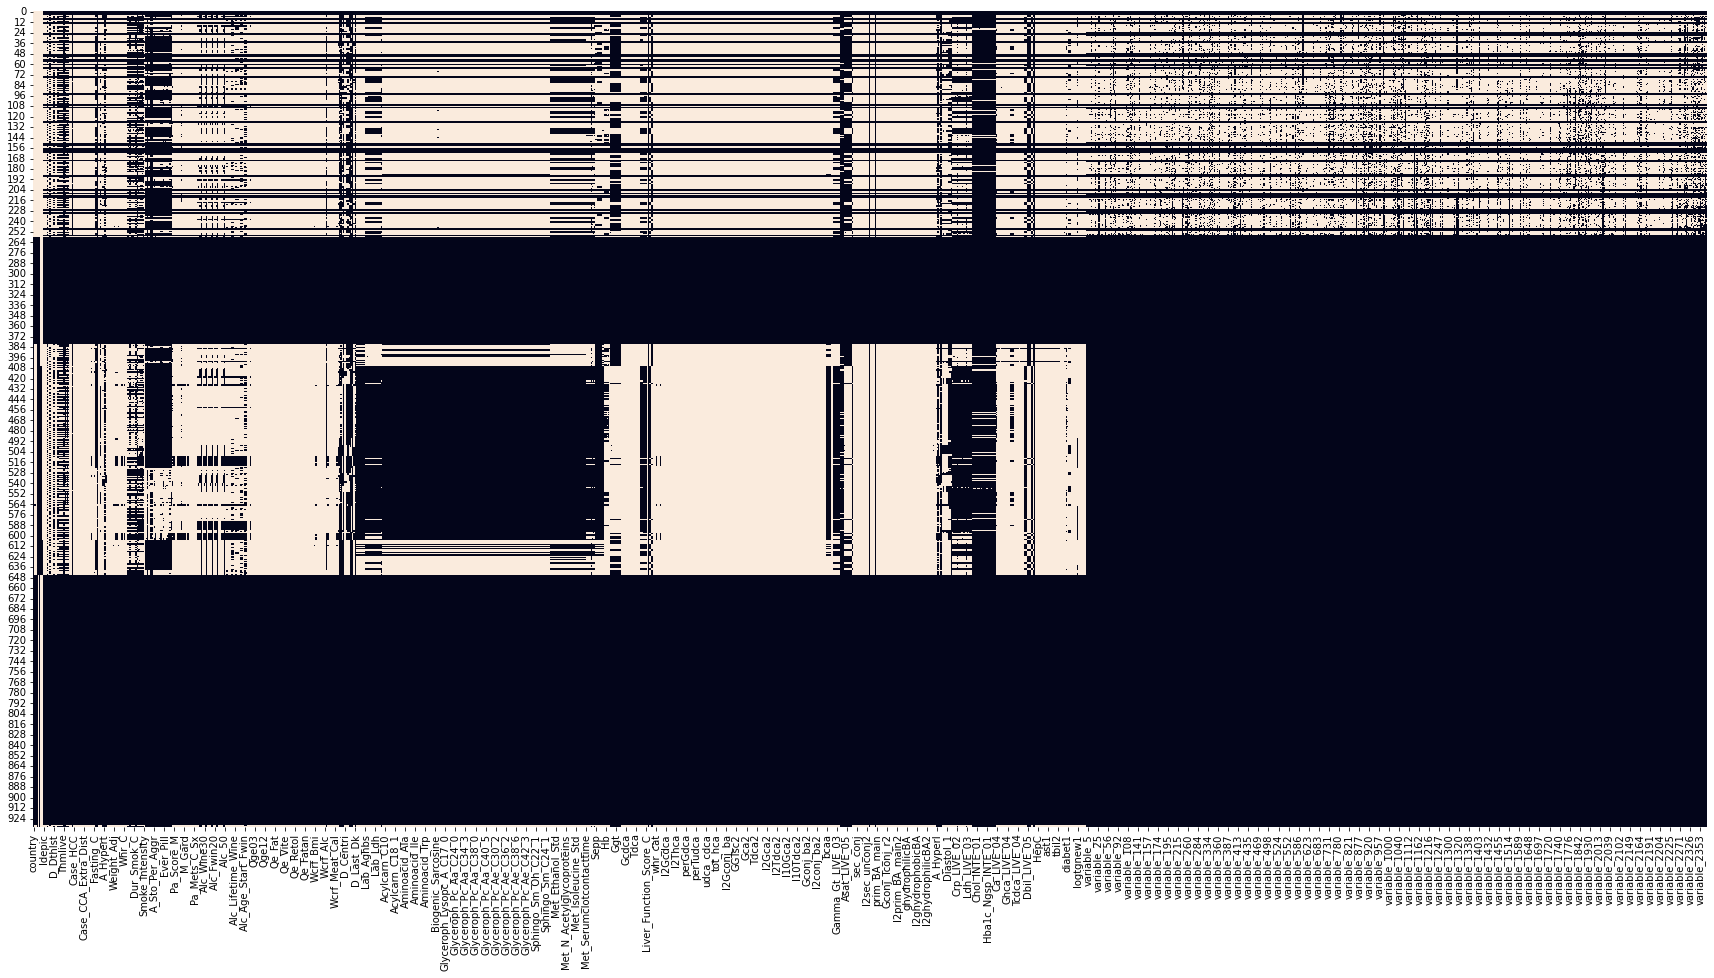

In [360]:
plt.figure(figsize=(30,15))
sns.heatmap(merge_full_outer.notna(), cbar=False);

### Inner merge of peak table and metadata based on *SampleID* column

### and drop the metadata columns of the peakTable_HILIC_POS_full from the merged dataframe

In [368]:
merge_full_inner = pd.merge(whole_metadata_merge.rename(columns={'sample_ID': 'SampleID'}), peakTable_HILIC_POS_full, how='inner', on='SampleID')
merge_full_inner = merge_full_inner.drop([col for col in peakTable_HILIC_POS_full if 'variable_' not in col and col != 'SampleID'], axis=1)

print(merge_full_inner.shape)
merge_full_inner.head()

(186, 1501)


,country,Center,Idepic_Bio,Idepic_Samp,SampleID,Id_Bma,Id Aliquot,CaseCtrl,ID_split_HCC,Idepic,...,variable_2339,variable_2340,variable_2350,variable_2353,variable_2364,variable_2365,variable_2368,variable_2370,variable_2375,variable_2379
0,4.0,41.0,41____41041872,41041872-s2#C1,LivCan_153,41-LivCan_153,41041872-s2#C,Incident,41041872.0,41____41041872,...,12.052252,12.568647,13.192848,13.230752,12.248590,12.114328,14.269258,12.355017,13.114289,13.882526
1,4.0,41.0,41____41046868,41046868-s2#C1,LivCan_154,41-LivCan_154,41046868-s2#C,Non-case,41046868.0,41____41046868,...,13.020365,12.928643,13.697314,NaN,12.604052,NaN,NaN,12.208084,NaN,NaN
2,4.0,41.0,41____41074588,41074588-s1#B1,LivCan_267,41-LivCan_267,41074588-s1#B,Incident,41074588.0,41____41074588,...,NaN,NaN,NaN,13.330175,NaN,NaN,14.215988,NaN,12.955618,13.778398
3,4.0,41.0,41____41089214,41089214-s1#B1,LivCan_268,41-LivCan_268,41089214-s1#B,Non-case,41089214.0,41____41089214,...,NaN,NaN,13.086805,13.304171,NaN,11.605353,14.284148,12.319119,13.058285,13.812829
4,2.0,21.0,21____21103888,21103888-s1#B1,LivCan_299,21-LivCan_299,21103888-s1#B,Incident,21103888.0,21____21103888,...,NaN,NaN,NaN,13.306722,12.349830,11.926237,14.192775,NaN,13.006556,13.841201


### Examine number of missing values for each column

In [369]:
merge_full_inner.isna().sum().sort_values()

country        0
l10Tudca2      0
l10Tamca2      0
l10Udca2       0
prim_BA2       0
            ... 
seca_all     186
lab_tbil     186
SumI         186
H_Fasting    186
seca_all2    186
Length: 1501, dtype: int64

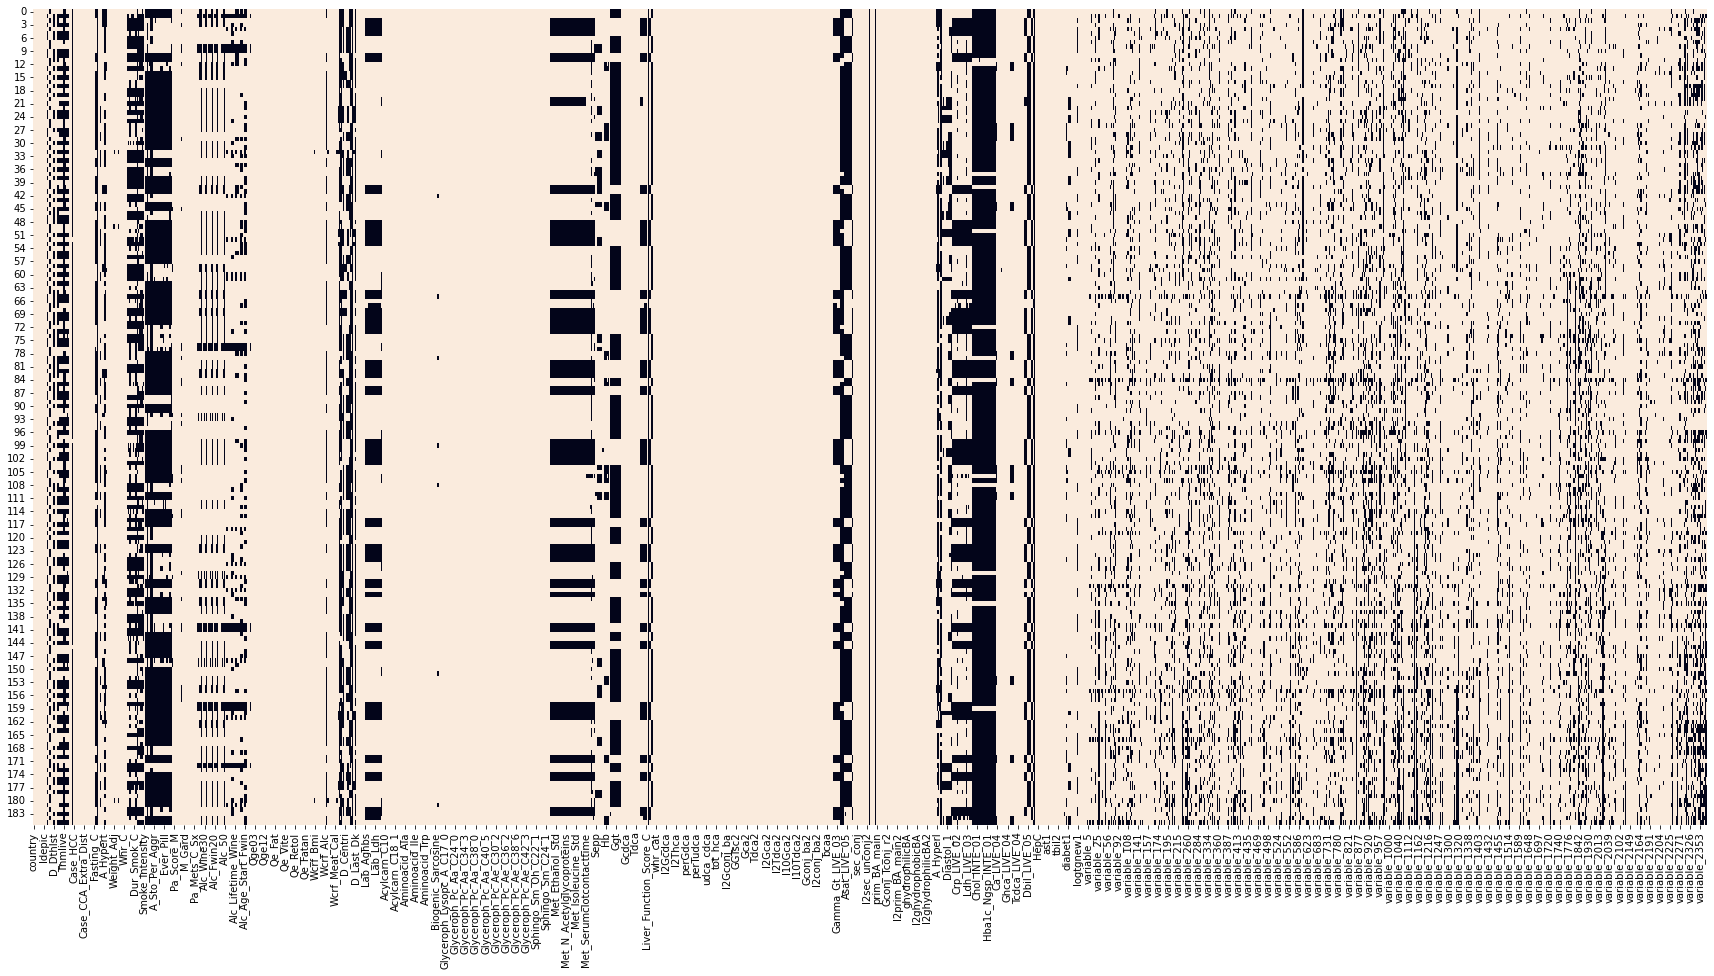

In [370]:
plt.figure(figsize=(30,15))
sns.heatmap(merge_full_inner.notna(), cbar=False);

### Save merged peak tables (outer and inner merges)

In [371]:
merge_full_outer.to_csv(pwd + 'data/prepare_HCC_data/usable_peakTables/peakTable-metaboigniter_and_metadata-outer_merge.csv',
                        index = False, header=True)
merge_full_inner.to_csv(pwd + 'data/prepare_HCC_data/usable_peakTables/peakTable-metaboigniter_and_metadata-inner_merge.csv',
                        index = False, header=True)

# Merge metadata with peak table computed with Agilent pipeline

## For Agilent analysis, we have 3 peak tables :
- *RP POS microbiota annotations_original data.csv* : used in earlier paper (PMID: 32734650)
- *RP POS microbiota annotations_new unfiltered MFE data.csv* : much bigger file that was not filtered at all
- *EPIC liver RP POS 250522.csv* : used for the final analysis

### We will merge these 3 files with metadata but only use the one used for the final analysis

## Import peak tables from Agilent analysis

In [217]:
# ORIGINAL peak table
peakTable = pd.read_csv(pwd + 'data/prepare_HCC_data/RP POS microbiota annotations_original data.csv', sep=',', decimal='.', na_values='NA')
peakTable = peakTable.transpose()
peakTable = peakTable.rename(columns=peakTable.iloc[0])
peakTable = peakTable.drop(['Compound'], axis=0)
peakTable = peakTable.reset_index()
peakTable = peakTable.rename(columns={'index': 'SampleID_full'})
peakTable.insert(loc=0,
                 column='SampleID',
                 value=peakTable['SampleID_full'].str.split('-').str[-1].str.split('_').str[:-1].str.join('_'))
peakTable_RP_POS_original = peakTable.copy()
peakTable_RP_POS_original

,SampleID,SampleID_full,L-Arginine,N-Methylnicotinamide,Epinephrine,Creatine,Equol,Creatine +0.6140724,Taurine,glutamine,...,Mannitol +0.66278136,Etiocholanedione +5.97954,lecithin +8.494925,3-methyldioxyindole +3.5556717,L-Rhamnulose +4.069282,Proline betaine +4.4143467,Glycochenodeoxycholic acid (2) +6.552671,Indole-3-carboxylic acid +1.8496325,Isocitric acid,Lysine +0.8576003
0,LivCan_127,003_61-LivCan_127_003,19462.0,24515.0,458207.0,2597576.0,89176.0,8262474.0,446574.0,484032.0,...,NaN,24035.0,NaN,2060.0,NaN,NaN,NaN,14146.0,37972.0,1957255.0
1,LivCan_128,004_61-LivCan_128_004,20900.0,68285.0,516557.0,2219325.0,99224.0,7018012.0,487520.0,277711.0,...,323383.0,27089.0,NaN,8893.0,5799.0,NaN,NaN,NaN,NaN,1244764.0
2,LivCan_285,005_61-LivCan_285_005,22087.0,32511.0,482599.0,2358169.0,114112.0,7993380.0,607265.0,441242.0,...,NaN,NaN,NaN,16294.0,8127.0,NaN,43353.0,NaN,NaN,NaN
3,LivCan_286,006_61-LivCan_286_006,38269.0,68032.0,447377.0,2060871.0,71502.0,8044035.0,624562.0,419594.0,...,NaN,NaN,NaN,145511.0,17885.0,63467.0,NaN,NaN,NaN,3053811.0
4,LivCan_153,007_41-LivCan_153_007,18556.0,16317.0,619389.0,2662091.0,97194.0,9954784.0,327171.0,300989.0,...,47156.0,14465.0,470827.0,3169.0,NaN,NaN,92942.0,NaN,14278.0,954566.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253,LivCan_376,282_22-LivCan_376_282,27140.0,45385.0,685327.0,2694025.0,43481.0,5477736.0,414216.0,399130.0,...,NaN,NaN,NaN,NaN,NaN,NaN,90705.0,NaN,NaN,NaN
254,LivCan_165,283_71-LivCan_165_283,31958.0,57053.0,793778.0,1933926.0,71949.0,5547938.0,731084.0,430466.0,...,52525.0,16341.0,NaN,NaN,NaN,NaN,NaN,24708.0,NaN,NaN
255,LivCan_166,284_71-LivCan_166_284,24199.0,33317.0,848489.0,2877161.0,46335.0,6696412.0,289524.0,424737.0,...,211494.0,10300.0,NaN,19132.0,23094.0,NaN,NaN,NaN,NaN,NaN
256,LivCan_029,285_41-LivCan_029_285,14512.0,44975.0,646586.0,2176356.0,69545.0,5650170.0,595244.0,438970.0,...,96932.0,NaN,313089.0,32327.0,15381.0,6775.0,NaN,NaN,NaN,NaN


In [219]:
# UNFILTERED peak table
peakTable = pd.read_csv(pwd + 'data/prepare_HCC_data/RP POS microbiota annotations_new unfiltered MFE data.csv', sep=',', decimal='.', na_values='NA')
peakTable = peakTable.transpose()
peakTable = peakTable.rename(columns=peakTable.iloc[0])
peakTable = peakTable.drop(['Compound'], axis=0)
peakTable = peakTable.reset_index()
peakTable = peakTable.rename(columns={'index': 'SampleID_full'})
peakTable.insert(loc=0,
                 column='SampleID',
                 value=peakTable['SampleID_full'].str.split('-').str[-1].str.split('_').str[:-1].str.join('_'))
peakTable_RP_POS_unfiltered = peakTable.copy()
peakTable_RP_POS_unfiltered

,SampleID,SampleID_full,Proline betaine,Proline betaine Esi+0.71200514,L-Valine,L-Phenylalanine (Phe),L-Valine Esi+0.65299994,tryptophan,tryptophan Esi+2.2829988,2-methylbutyrate (HMDB0002176) / Isovaleric acid (5:0) (HMDB0000718),...,"glycochenodeoxycholate sulfate (HMDB0002497) / N-[(3a,5b,7b)-7-hydroxy-24-oxo-3-(sulfooxy)cholan-24-yl]-Glycine (HMDB0002409)",2-Methylerythritol Esi+3.4488654,Lauric acid (12:0) Esi+5.6079946,D-alpha-Aminobutyric acid (HMDB0000650) / dimethylglycine (HMDB0000092) / GABA (HMDB0000112) / L-alpha-Aminobutyric acid (HMDB0000452) Esi+4.467588,cis-2-Methylaconitate Esi+8.439439,3-hydroxybutyric acid (HMDB0000357) / 4-Hydroxybutyric acid (HMDB0000710) / hydroxy-isobutyric acid (HMDB0000729) Esi+3.7422376,urea Esi+4.4950013,O-desmethylangolensin (ODMA) Esi+6.5020065,3-Methylhistidine Esi+2.9180892,Pelargonic acid (9:0) Esi+5.784802
0,LivCan_127,003_61-LivCan_127_003,30495118.0,22438024.0,29454924.0,18209700.0,14080410.0,12544996.0,10666473.0,9104533.0,...,NaN,NaN,NaN,NaN,3194.0,9324.0,NaN,6432.0,2631.0,NaN
1,LivCan_128,004_61-LivCan_128_004,27368866.0,4508720.0,26054884.0,16802976.0,9894339.0,11768643.0,11534381.0,7681117.0,...,NaN,3077.0,NaN,4422.0,NaN,NaN,NaN,NaN,NaN,NaN
2,LivCan_285,005_61-LivCan_285_005,29601148.0,1909843.0,28517132.0,18379738.0,5731939.0,9963535.0,8782296.0,8730574.0,...,NaN,NaN,NaN,NaN,NaN,7109.0,2738.0,5142.0,NaN,NaN
3,LivCan_286,006_61-LivCan_286_006,43688760.0,19726766.0,23940876.0,26773364.0,11141017.0,10447523.0,10402394.0,8757490.0,...,NaN,2053.0,NaN,NaN,2828.0,NaN,8334.0,NaN,NaN,NaN
4,LivCan_153,007_41-LivCan_153_007,30334362.0,2787022.0,32667012.0,19060870.0,10379670.0,14955174.0,13700366.0,11024373.0,...,NaN,3959.0,NaN,3388.0,3038.0,NaN,2767.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253,LivCan_376,282_22-LivCan_376_282,24337242.0,6533744.0,26703618.0,14908998.0,7281741.0,13053613.0,11543516.0,6014192.0,...,NaN,NaN,4628.0,NaN,NaN,NaN,2183.0,NaN,NaN,2874.0
254,LivCan_165,283_71-LivCan_165_283,35559772.0,5725473.0,30108536.0,20749186.0,13528786.0,16772205.0,15478178.0,6005637.0,...,5121.0,NaN,3383.0,3873.0,5070.0,13076.0,NaN,NaN,NaN,3052.0
255,LivCan_166,284_71-LivCan_166_284,16682628.0,1136585.0,26186092.0,10671186.0,9648071.0,10665194.0,9184292.0,7358068.0,...,NaN,NaN,4179.0,NaN,5878.0,3957.0,2040.0,NaN,NaN,NaN
256,LivCan_029,285_41-LivCan_029_285,29870892.0,199451.0,25814636.0,18202112.0,11216013.0,9575623.0,8809595.0,6131385.0,...,NaN,NaN,3303.0,NaN,NaN,3938.0,3399.0,5328.0,NaN,3014.0


In [387]:
# FINAL peak table
peakTable = pd.read_csv(pwd + 'data/prepare_HCC_data/EPIC liver RP POS 250522.csv', sep=',', decimal='.', na_values='NA')


# Put annotation column 
Annotations = peakTable.pop('Annotations')
peakTable.insert(1, 'Annotations', Annotations)

# Create dataframe with only compounds and their potential annotation
compounds_annotations = peakTable[['Compound', 'Annotations']]

# Drop annotation column
peakTable = peakTable.drop('Annotations', axis=1)

# Arrange peak table form
peakTable = peakTable.transpose()
peakTable = peakTable.rename(columns=peakTable.iloc[0])
peakTable = peakTable.drop(['Compound'], axis=0)
peakTable = peakTable.reset_index()
peakTable = peakTable.rename(columns={'index': 'SampleID_full'})

# Create SampleID column (format LivCan_XXX or Blank_XXX)
SampleID = ['_'.join(ID.split('-')[-1].split('_')[:-1]) if ('LivCan' in ID) \
            else '_'.join(ID.split('_')[-2:]) for ID in peakTable['SampleID_full']]
peakTable.insert(loc=0,
                 column='SampleID',
                 value=SampleID)

# All cells with value 1 are imputed missing value, we re-delete these values to re-impute with other methods later
peakTable[peakTable == 1] = np.nan

# Change dataframe name
peakTable_RP_POS_final = peakTable.copy()
peakTable_RP_POS_final

,SampleID,SampleID_full,89.9697@0.5505152,90.973@0.55399996,939.813@0.56963736,157.9574@0.5643974,871.8258@0.5736113,803.8387@0.5745634,973.8083@0.56959826,599.8754@0.5742488,...,225.1218@0.86389714,398.7578@8.768545,288.1272@6.883725,126.0287@1.5353005,429.2873@6.211831,419.2505@8.916426,518.2205@6.2066946,400.2586@7.130359,103.0998@7.112515,267.142@6.969883
0,Blank_001,EPIC_Liver_Cancer_NR160614_001_Blank_001,48008,418,NaN,16766,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,LivCan_153,EPIC_Liver_Cancer_NR160614_007_41-LivCan_153_007,4195138,40495,42242,2794282,50841,60628,74517,100523,...,NaN,98959,20987,178906,NaN,184072,2547,6454,NaN,149023
2,LivCan_154,EPIC_Liver_Cancer_NR160614_008_41-LivCan_154_008,4306680,38555,49922,2930790,61613,73916,84277,120525,...,2414,93145,28323,NaN,NaN,NaN,1043,6390,403011,164386
3,LivCan_267,EPIC_Liver_Cancer_NR160614_009_41-LivCan_267_009,4457872,41892,49890,2974132,61331,73473,86310,116998,...,NaN,93997,16393,171962,NaN,125149,NaN,9443,NaN,99967
4,LivCan_268,EPIC_Liver_Cancer_NR160614_010_41-LivCan_268_010,4128863,39711,33517,2769811,40177,46566,60449,80091,...,1378,93555,NaN,NaN,4293,140514,4280,5900,399109,164202
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224,LivCan_376,EPIC_Liver_Cancer_NR160614_282_22-LivCan_376_282,4643850,44234,62270,3170819,75882,94129,104118,120689,...,4761,NaN,16624,108831,3127,NaN,2387,17483,369559,NaN
225,LivCan_165,EPIC_Liver_Cancer_NR160614_283_71-LivCan_165_283,4107050,38737,27127,2681910,30093,39345,52179,57230,...,38674,89525,11619,105422,3152,89313,2485,14052,212520,NaN
226,LivCan_166,EPIC_Liver_Cancer_NR160614_284_71-LivCan_166_284,4671588,42617,66228,3178603,80117,101130,113785,129753,...,12552,77676,17258,168359,NaN,64781,NaN,7124,359724,NaN
227,LivCan_029,EPIC_Liver_Cancer_NR160614_285_41-LivCan_029_285,4065763,37932,32015,2674482,36238,45743,57630,64451,...,7819,96130,30249,20281,2489,76704,2116,4916,NaN,97693


In [388]:
peakTable_RP_POS_final.to_csv(pwd + 'data/prepare_HCC_data/peakTable-Agilent.csv',
                              index = False, header=True)

In [386]:
compounds_annotations.to_csv(pwd + 'data/prepare_HCC_data/Agilent-compounds_annotations.csv',
                             index = False, header=True)

In [222]:
compound_annotations[~compound_annotations['Compound'].str.contains('@')]

,Compound,Annotations
63,N-Methylnicotinamide,"N-Methylnicotinamide [ C7 H8 N2 O, tgt=, overa..."
64,Epinephrine,"Epinephrine [ C9 H13 N O3, tgt=, overall=84.57..."
70,creatinine,"creatinine [ C4 H7 N3 O, tgt=, overall=98.69, ..."
75,guanidoacetate,"guanidoacetate [ C3 H7 N3 O2, tgt=, overall=87..."
76,L-Alanine,"L-Alanine [ C3 H7 N O2, tgt=, overall=99.64, d..."
...,...,...
1154,Dimethylsulfone,"Dimethylsulfone [ C2 H6 O2 S, tgt=, overall=47..."
1160,Sphingosine,"Sphingosine [ C18 H37 N O2, tgt=, overall=82.7..."
1163,Proline betaine +2.3243585,"Proline betaine [ C7 H13 N O2, tgt=, overall=4..."
1167,homocysteine,"homocysteine [ C4 H9 N O2 S, tgt=, overall=46...."


In [223]:
compound_annotations[~compound_annotations['Compound'].str.contains('@')].loc[63, 'Annotations']

'N-Methylnicotinamide [ C7 H8 N2 O, tgt=, overall=92.47, db=92.47, HMP ID=HMDB03152 ]'

### Columns containing *'Valine'* in each dataframe

In [224]:
# RP POS microbiota annotations_original data.csv
peakTable_RP_POS_unfiltered.columns[peakTable_RP_POS_full.columns.str.contains('Valine')]

Index(['L-Valine', 'L-Valine Esi+0.65299994', 'L-Valine Esi+0.6479996',
       'L-Valine Esi+0.87699914', 'L-Valine Esi+0.74547684',
       'L-Valine Esi+0.815936', 'L-Valine Esi+0.81700045',
       'L-Valine Esi+0.8787397', 'L-Valine Esi+0.3604113',
       'L-Valine Esi+1.3258417'],
      dtype='object')

In [225]:
# RP POS microbiota annotations_original data.csv
peakTable_RP_POS_original.columns[peakTable_RP_POS.columns.str.contains('Valine')]

Index(['L-Valine', 'L-Valine +0.6508086', 'L-Valine +0.8142533',
       'L-Valine +0.8177888', 'L-Valine +0.87528104', 'L-Valine +0.6501161'],
      dtype='object')

## Merge for FINAL peak table

### Outer merge of FINAL peak table and metadata based on *SampleID* column

In [243]:
merge_full_outer = pd.merge(whole_metadata_merge.rename(columns={'sample_ID': 'SampleID'}), peakTable_RP_POS_final, how='outer', on='SampleID')
merge_full_outer.insert(merge_full_outer.columns.get_loc('SampleID') + 1, 'SampleID_full', merge_full_outer.pop('SampleID_full'))
print(merge_full_outer.shape)
merge_full_outer.head()

(937, 2160)


,country,Center,Idepic_Bio,Idepic_Samp,SampleID,SampleID_full,Id_Bma,Id Aliquot,CaseCtrl,ID_split_HCC,...,225.1218@0.86389714,398.7578@8.768545,288.1272@6.883725,126.0287@1.5353005,429.2873@6.211831,419.2505@8.916426,518.2205@6.2066946,400.2586@7.130359,103.0998@7.112515,267.142@6.969883
0,6.0,61.0,61____61202893,61202893-s2#C1,LivCan_127,NaN,61-LivCan_127,61202893-s2#C,Non-case,61202893.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6.0,61.0,61____61212533,61212533-s2#C1,LivCan_128,NaN,61-LivCan_128,61212533-s2#C,Incident,61212533.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,6.0,61.0,61____61100681,61100681-s2#C1,LivCan_285,NaN,61-LivCan_285,61100681-s2#C,Non-case,61100681.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6.0,61.0,61____61106550,61106550-s2#C1,LivCan_286,NaN,61-LivCan_286,61106550-s2#C,Incident,61106550.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4.0,41.0,41____41041872,41041872-s2#C1,LivCan_153,EPIC_Liver_Cancer_NR160614_007_41-LivCan_153_007,41-LivCan_153,41041872-s2#C,Incident,41041872.0,...,NaN,98959,20987,178906,NaN,184072,2547,6454,NaN,149023


In [244]:
merge_full_outer[merge_full_outer['SampleID'] == 'Blank_001']

,country,Center,Idepic_Bio,Idepic_Samp,SampleID,SampleID_full,Id_Bma,Id Aliquot,CaseCtrl,ID_split_HCC,...,225.1218@0.86389714,398.7578@8.768545,288.1272@6.883725,126.0287@1.5353005,429.2873@6.211831,419.2505@8.916426,518.2205@6.2066946,400.2586@7.130359,103.0998@7.112515,267.142@6.969883
934,NaN,NaN,NaN,NaN,Blank_001,EPIC_Liver_Cancer_NR160614_001_Blank_001,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Blanks has been added

### Examine number of missing values for each column

In [245]:
merge_full_outer.isna().sum().sort_values()

ID_split_HCC       43
Id Aliquot        243
CaseCtrl          243
SampleID          388
Idepic_Bio        412
                 ... 
Phase_Mnscycle    928
seca_all2         937
SumI              937
lab_tbil          937
seca_all          937
Length: 2160, dtype: int64

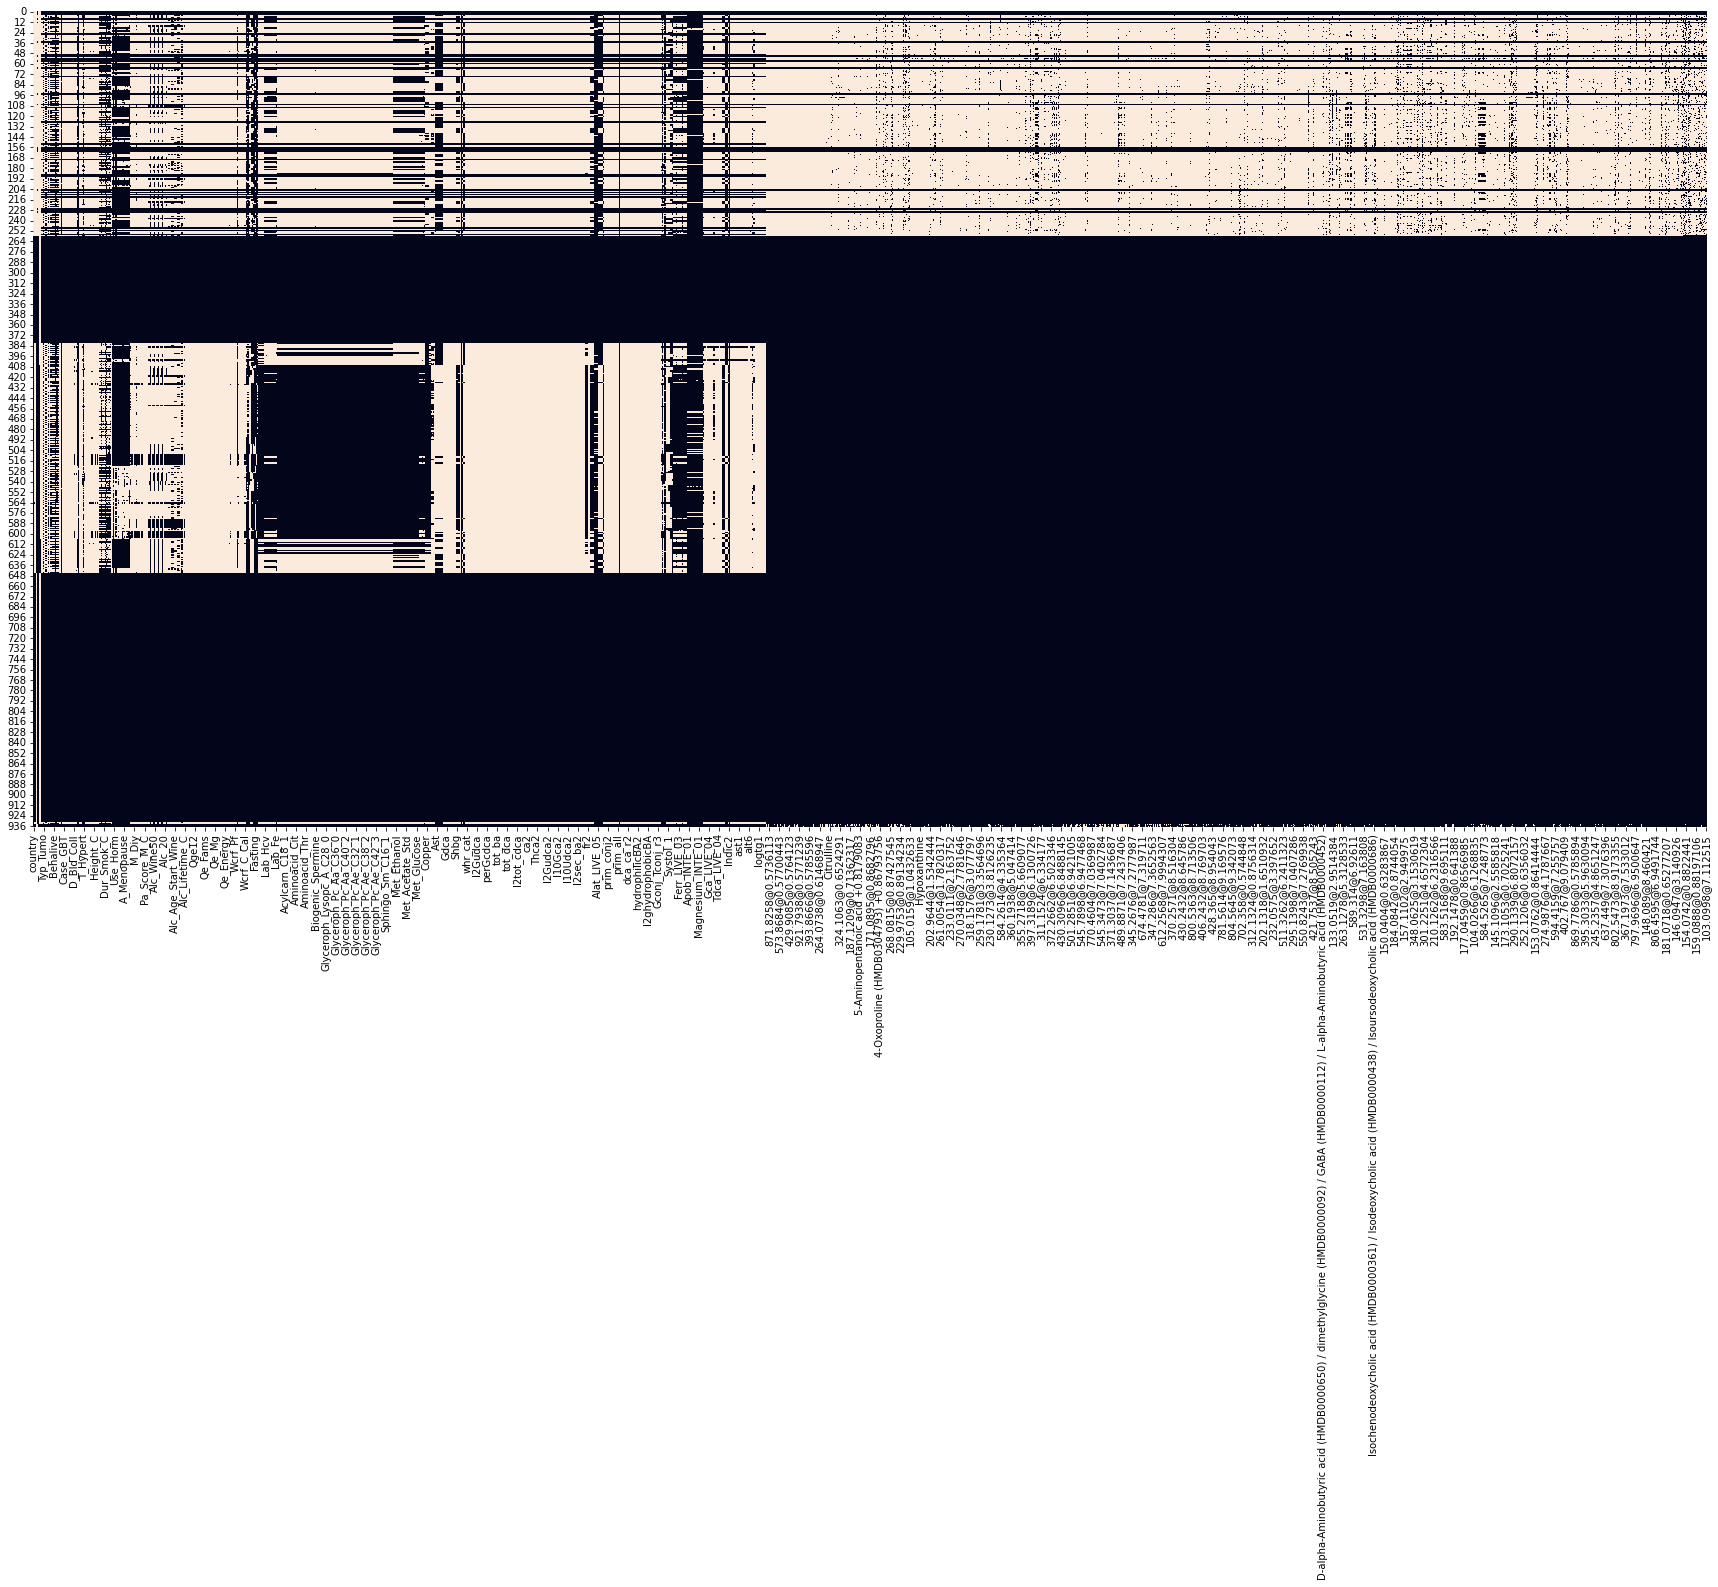

In [246]:
plt.figure(figsize=(30,15))
sns.heatmap(merge_full_outer.notna(), cbar=False);

### Inner merge of FINAL peak table and metadata based on *SampleID* column

### Get rows for Blanks from outer merge to also put it in the inner merge

In [248]:
merge_full_Blanks = merge_full_outer[merge_full_outer['SampleID'].str.contains('Blank_', na=False)]
merge_full_Blanks

,country,Center,Idepic_Bio,Idepic_Samp,SampleID,SampleID_full,Id_Bma,Id Aliquot,CaseCtrl,ID_split_HCC,...,225.1218@0.86389714,398.7578@8.768545,288.1272@6.883725,126.0287@1.5353005,429.2873@6.211831,419.2505@8.916426,518.2205@6.2066946,400.2586@7.130359,103.0998@7.112515,267.142@6.969883
934,NaN,NaN,NaN,NaN,Blank_001,EPIC_Liver_Cancer_NR160614_001_Blank_001,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
935,NaN,NaN,NaN,NaN,Blank_101,EPIC_Liver_Cancer_NR160614_101_Blank_101,NaN,NaN,NaN,NaN,...,NaN,NaN,1429,NaN,NaN,NaN,NaN,NaN,NaN,NaN
936,NaN,NaN,NaN,NaN,Blank_201,EPIC_Liver_Cancer_NR160614_201_Blank_201,NaN,NaN,NaN,NaN,...,NaN,NaN,1685,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [250]:
# Inner merge
merge_full_inner = pd.merge(whole_metadata_merge.rename(columns={'sample_ID': 'SampleID'}), peakTable_RP_POS_final, how='inner', on='SampleID')
merge_full_inner.insert(merge_full_inner.columns.get_loc('SampleID') + 1, 'SampleID_full', merge_full_inner.pop('SampleID_full'))

# Add rows of Blanks
merge_full_inner = pd.concat([merge_full_Blanks, merge_full_inner], axis=0)
merge_full_inner.index = range(len(merge_full_inner))

print(merge_full_inner.shape)
merge_full_inner.head()

(229, 2160)


,country,Center,Idepic_Bio,Idepic_Samp,SampleID,SampleID_full,Id_Bma,Id Aliquot,CaseCtrl,ID_split_HCC,...,225.1218@0.86389714,398.7578@8.768545,288.1272@6.883725,126.0287@1.5353005,429.2873@6.211831,419.2505@8.916426,518.2205@6.2066946,400.2586@7.130359,103.0998@7.112515,267.142@6.969883
0,NaN,NaN,NaN,NaN,Blank_001,EPIC_Liver_Cancer_NR160614_001_Blank_001,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,Blank_101,EPIC_Liver_Cancer_NR160614_101_Blank_101,NaN,NaN,NaN,NaN,...,NaN,NaN,1429,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,Blank_201,EPIC_Liver_Cancer_NR160614_201_Blank_201,NaN,NaN,NaN,NaN,...,NaN,NaN,1685,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,41.0,41____41041872,41041872-s2#C1,LivCan_153,EPIC_Liver_Cancer_NR160614_007_41-LivCan_153_007,41-LivCan_153,41041872-s2#C,Incident,41041872.0,...,NaN,98959,20987,178906,NaN,184072,2547,6454,NaN,149023
4,4.0,41.0,41____41046868,41046868-s2#C1,LivCan_154,EPIC_Liver_Cancer_NR160614_008_41-LivCan_154_008,41-LivCan_154,41046868-s2#C,Non-case,41046868.0,...,2414,93145,28323,NaN,NaN,NaN,1043,6390,403011,164386


### Examine number of missing values for each column

In [251]:
# check if the merge went well
merge_full_inner['SampleID'].isna().sum() == 0

True

In [252]:
merge_full_inner.isna().sum().sort_values()

89.9697@0.5505152       0
563.3503@4.0477157      0
282.1677@3.010655       0
Piperidine              0
103.1@0.59041923        0
                     ... 
seca_all              229
lab_tbil              229
H_Fasting             229
seca_all2             229
SumI                  229
Length: 2160, dtype: int64

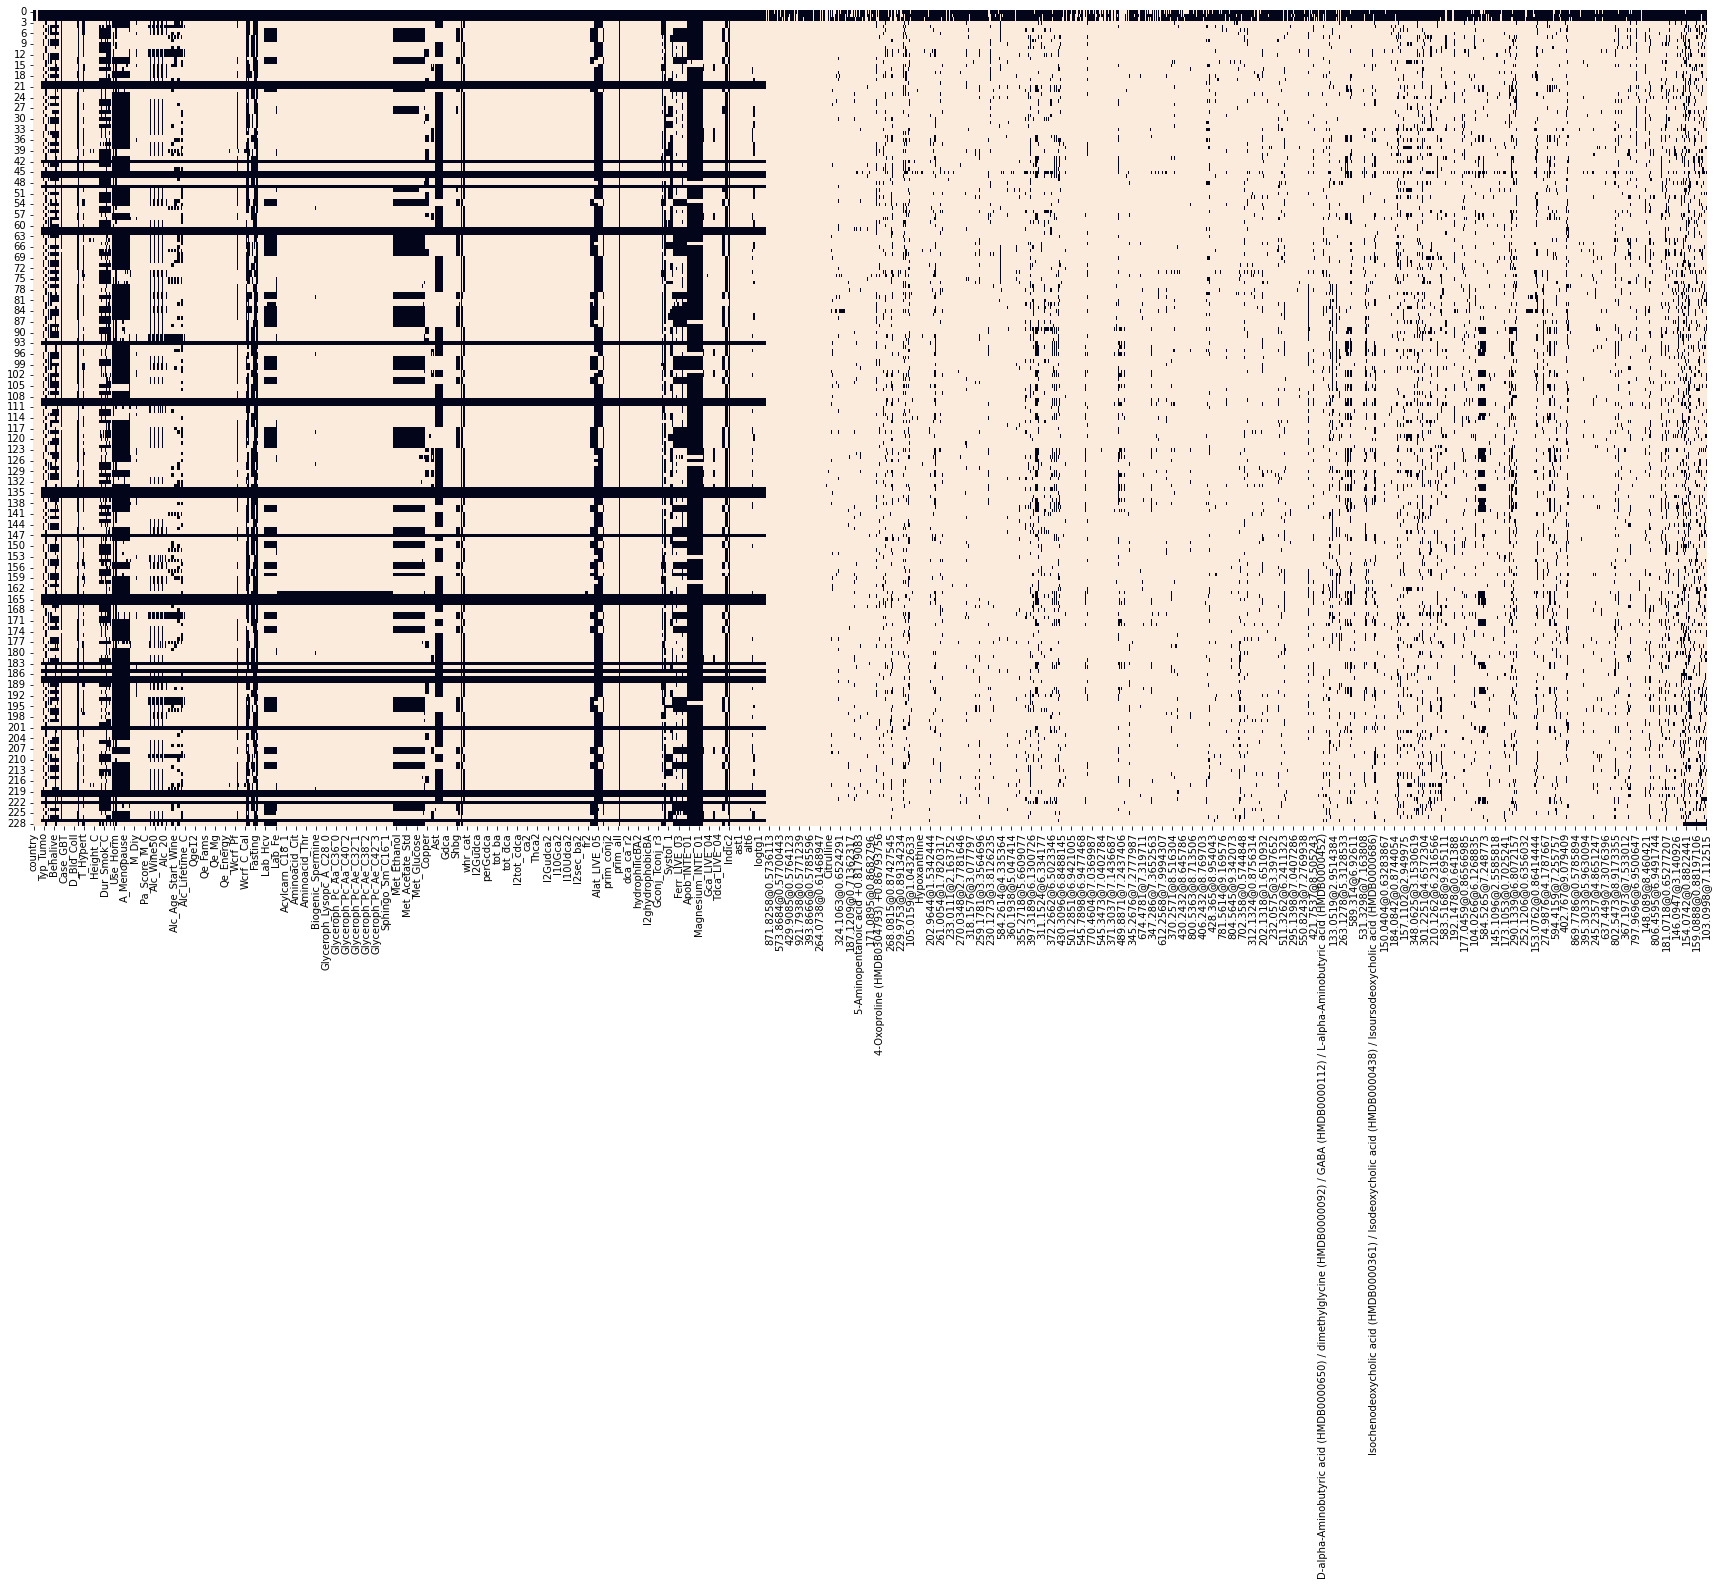

In [253]:
plt.figure(figsize=(30,15))
sns.heatmap(merge_full_inner.notna(), cbar=False);

### Save FINAL merged peak tables (outer and inner merges)

In [254]:
merge_full_outer.to_csv(pwd + 'data/prepare_HCC_data/usable_peakTables/peakTable-Agilent_and_metadata-final-outer_merge.csv',
                        index = False, header=True)
merge_full_inner.to_csv(pwd + 'data/prepare_HCC_data/usable_peakTables/peakTable-Agilent_and_metadata-final-inner_merge.csv',
                        index = False, header=True)

## Merge for ORIGINAL peak table

### Outer merge of ORIGINAL peak table and metadata based on *SampleID* column

In [255]:
merge_full_outer = pd.merge(whole_metadata_merge.rename(columns={'sample_ID': 'SampleID'}), peakTable_RP_POS_original, how='outer', on='SampleID')
merge_full_outer.insert(merge_full_outer.columns.get_loc('SampleID') + 1, 'SampleID_full', merge_full_outer.pop('SampleID_full'))
print(merge_full_outer.shape)
merge_full_outer.head()

(934, 1245)


,country,Center,Idepic_Bio,Idepic_Samp,SampleID,SampleID_full,Id_Bma,Id Aliquot,CaseCtrl,ID_split_HCC,...,Mannitol +0.66278136,Etiocholanedione +5.97954,lecithin +8.494925,3-methyldioxyindole +3.5556717,L-Rhamnulose +4.069282,Proline betaine +4.4143467,Glycochenodeoxycholic acid (2) +6.552671,Indole-3-carboxylic acid +1.8496325,Isocitric acid,Lysine +0.8576003
0,6.0,61.0,61____61202893,61202893-s2#C1,LivCan_127,003_61-LivCan_127_003,61-LivCan_127,61202893-s2#C,Non-case,61202893.0,...,NaN,24035.0,NaN,2060.0,NaN,NaN,NaN,14146.0,37972.0,1957255.0
1,6.0,61.0,61____61212533,61212533-s2#C1,LivCan_128,004_61-LivCan_128_004,61-LivCan_128,61212533-s2#C,Incident,61212533.0,...,323383.0,27089.0,NaN,8893.0,5799.0,NaN,NaN,NaN,NaN,1244764.0
2,6.0,61.0,61____61100681,61100681-s2#C1,LivCan_285,005_61-LivCan_285_005,61-LivCan_285,61100681-s2#C,Non-case,61100681.0,...,NaN,NaN,NaN,16294.0,8127.0,NaN,43353.0,NaN,NaN,NaN
3,6.0,61.0,61____61106550,61106550-s2#C1,LivCan_286,006_61-LivCan_286_006,61-LivCan_286,61106550-s2#C,Incident,61106550.0,...,NaN,NaN,NaN,145511.0,17885.0,63467.0,NaN,NaN,NaN,3053811.0
4,4.0,41.0,41____41041872,41041872-s2#C1,LivCan_153,007_41-LivCan_153_007,41-LivCan_153,41041872-s2#C,Incident,41041872.0,...,47156.0,14465.0,470827.0,3169.0,NaN,NaN,92942.0,NaN,14278.0,954566.0


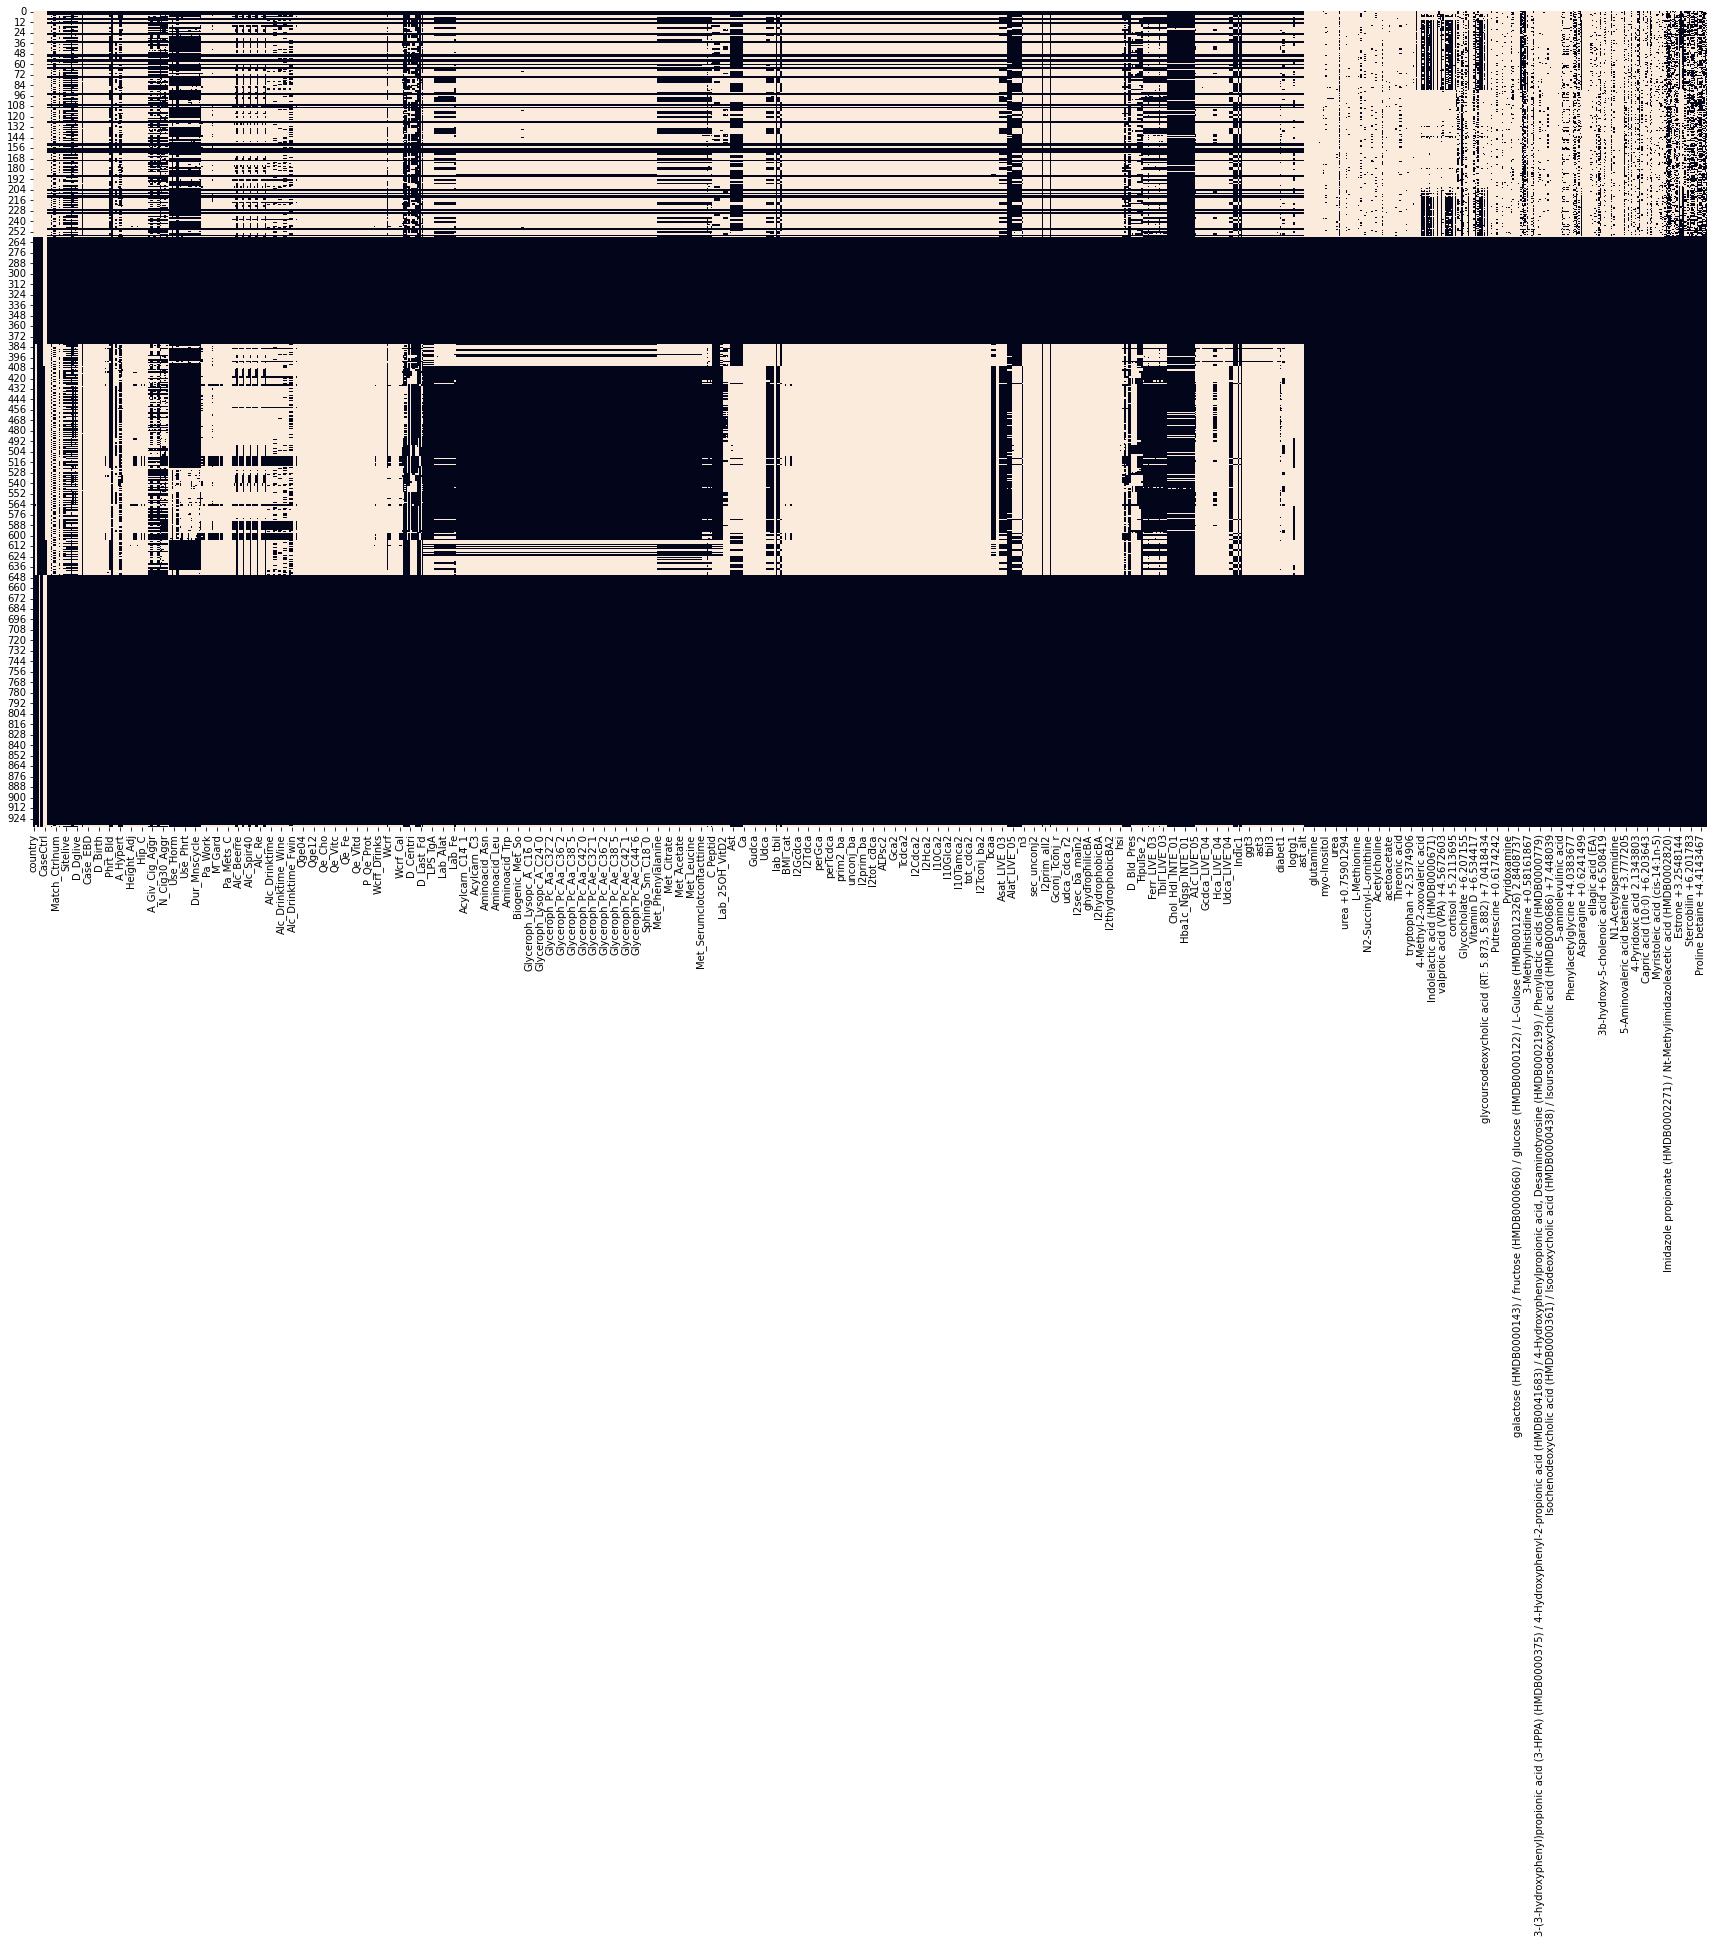

In [256]:
plt.figure(figsize=(30,15))
sns.heatmap(merge_full_outer.notna(), cbar=False);

### Inner merge of ORIGINAL peak table and metadata based on *SampleID* column

In [257]:
merge_full_inner = pd.merge(whole_metadata_merge.rename(columns={'sample_ID': 'SampleID'}), peakTable_RP_POS_original, how='inner', on='SampleID')
merge_full_inner.insert(merge_full_inner.columns.get_loc('SampleID') + 1, 'SampleID_full', merge_full_inner.pop('SampleID_full'))
print(merge_full_inner.shape)
merge_full_inner.head()

(258, 1245)


,country,Center,Idepic_Bio,Idepic_Samp,SampleID,SampleID_full,Id_Bma,Id Aliquot,CaseCtrl,ID_split_HCC,...,Mannitol +0.66278136,Etiocholanedione +5.97954,lecithin +8.494925,3-methyldioxyindole +3.5556717,L-Rhamnulose +4.069282,Proline betaine +4.4143467,Glycochenodeoxycholic acid (2) +6.552671,Indole-3-carboxylic acid +1.8496325,Isocitric acid,Lysine +0.8576003
0,6.0,61.0,61____61202893,61202893-s2#C1,LivCan_127,003_61-LivCan_127_003,61-LivCan_127,61202893-s2#C,Non-case,61202893.0,...,NaN,24035.0,NaN,2060.0,NaN,NaN,NaN,14146.0,37972.0,1957255.0
1,6.0,61.0,61____61212533,61212533-s2#C1,LivCan_128,004_61-LivCan_128_004,61-LivCan_128,61212533-s2#C,Incident,61212533.0,...,323383.0,27089.0,NaN,8893.0,5799.0,NaN,NaN,NaN,NaN,1244764.0
2,6.0,61.0,61____61100681,61100681-s2#C1,LivCan_285,005_61-LivCan_285_005,61-LivCan_285,61100681-s2#C,Non-case,61100681.0,...,NaN,NaN,NaN,16294.0,8127.0,NaN,43353.0,NaN,NaN,NaN
3,6.0,61.0,61____61106550,61106550-s2#C1,LivCan_286,006_61-LivCan_286_006,61-LivCan_286,61106550-s2#C,Incident,61106550.0,...,NaN,NaN,NaN,145511.0,17885.0,63467.0,NaN,NaN,NaN,3053811.0
4,4.0,41.0,41____41041872,41041872-s2#C1,LivCan_153,007_41-LivCan_153_007,41-LivCan_153,41041872-s2#C,Incident,41041872.0,...,47156.0,14465.0,470827.0,3169.0,NaN,NaN,92942.0,NaN,14278.0,954566.0


In [258]:
# check if the merge went well
merge_full_inner['SampleID'].isna().sum() == 0

True

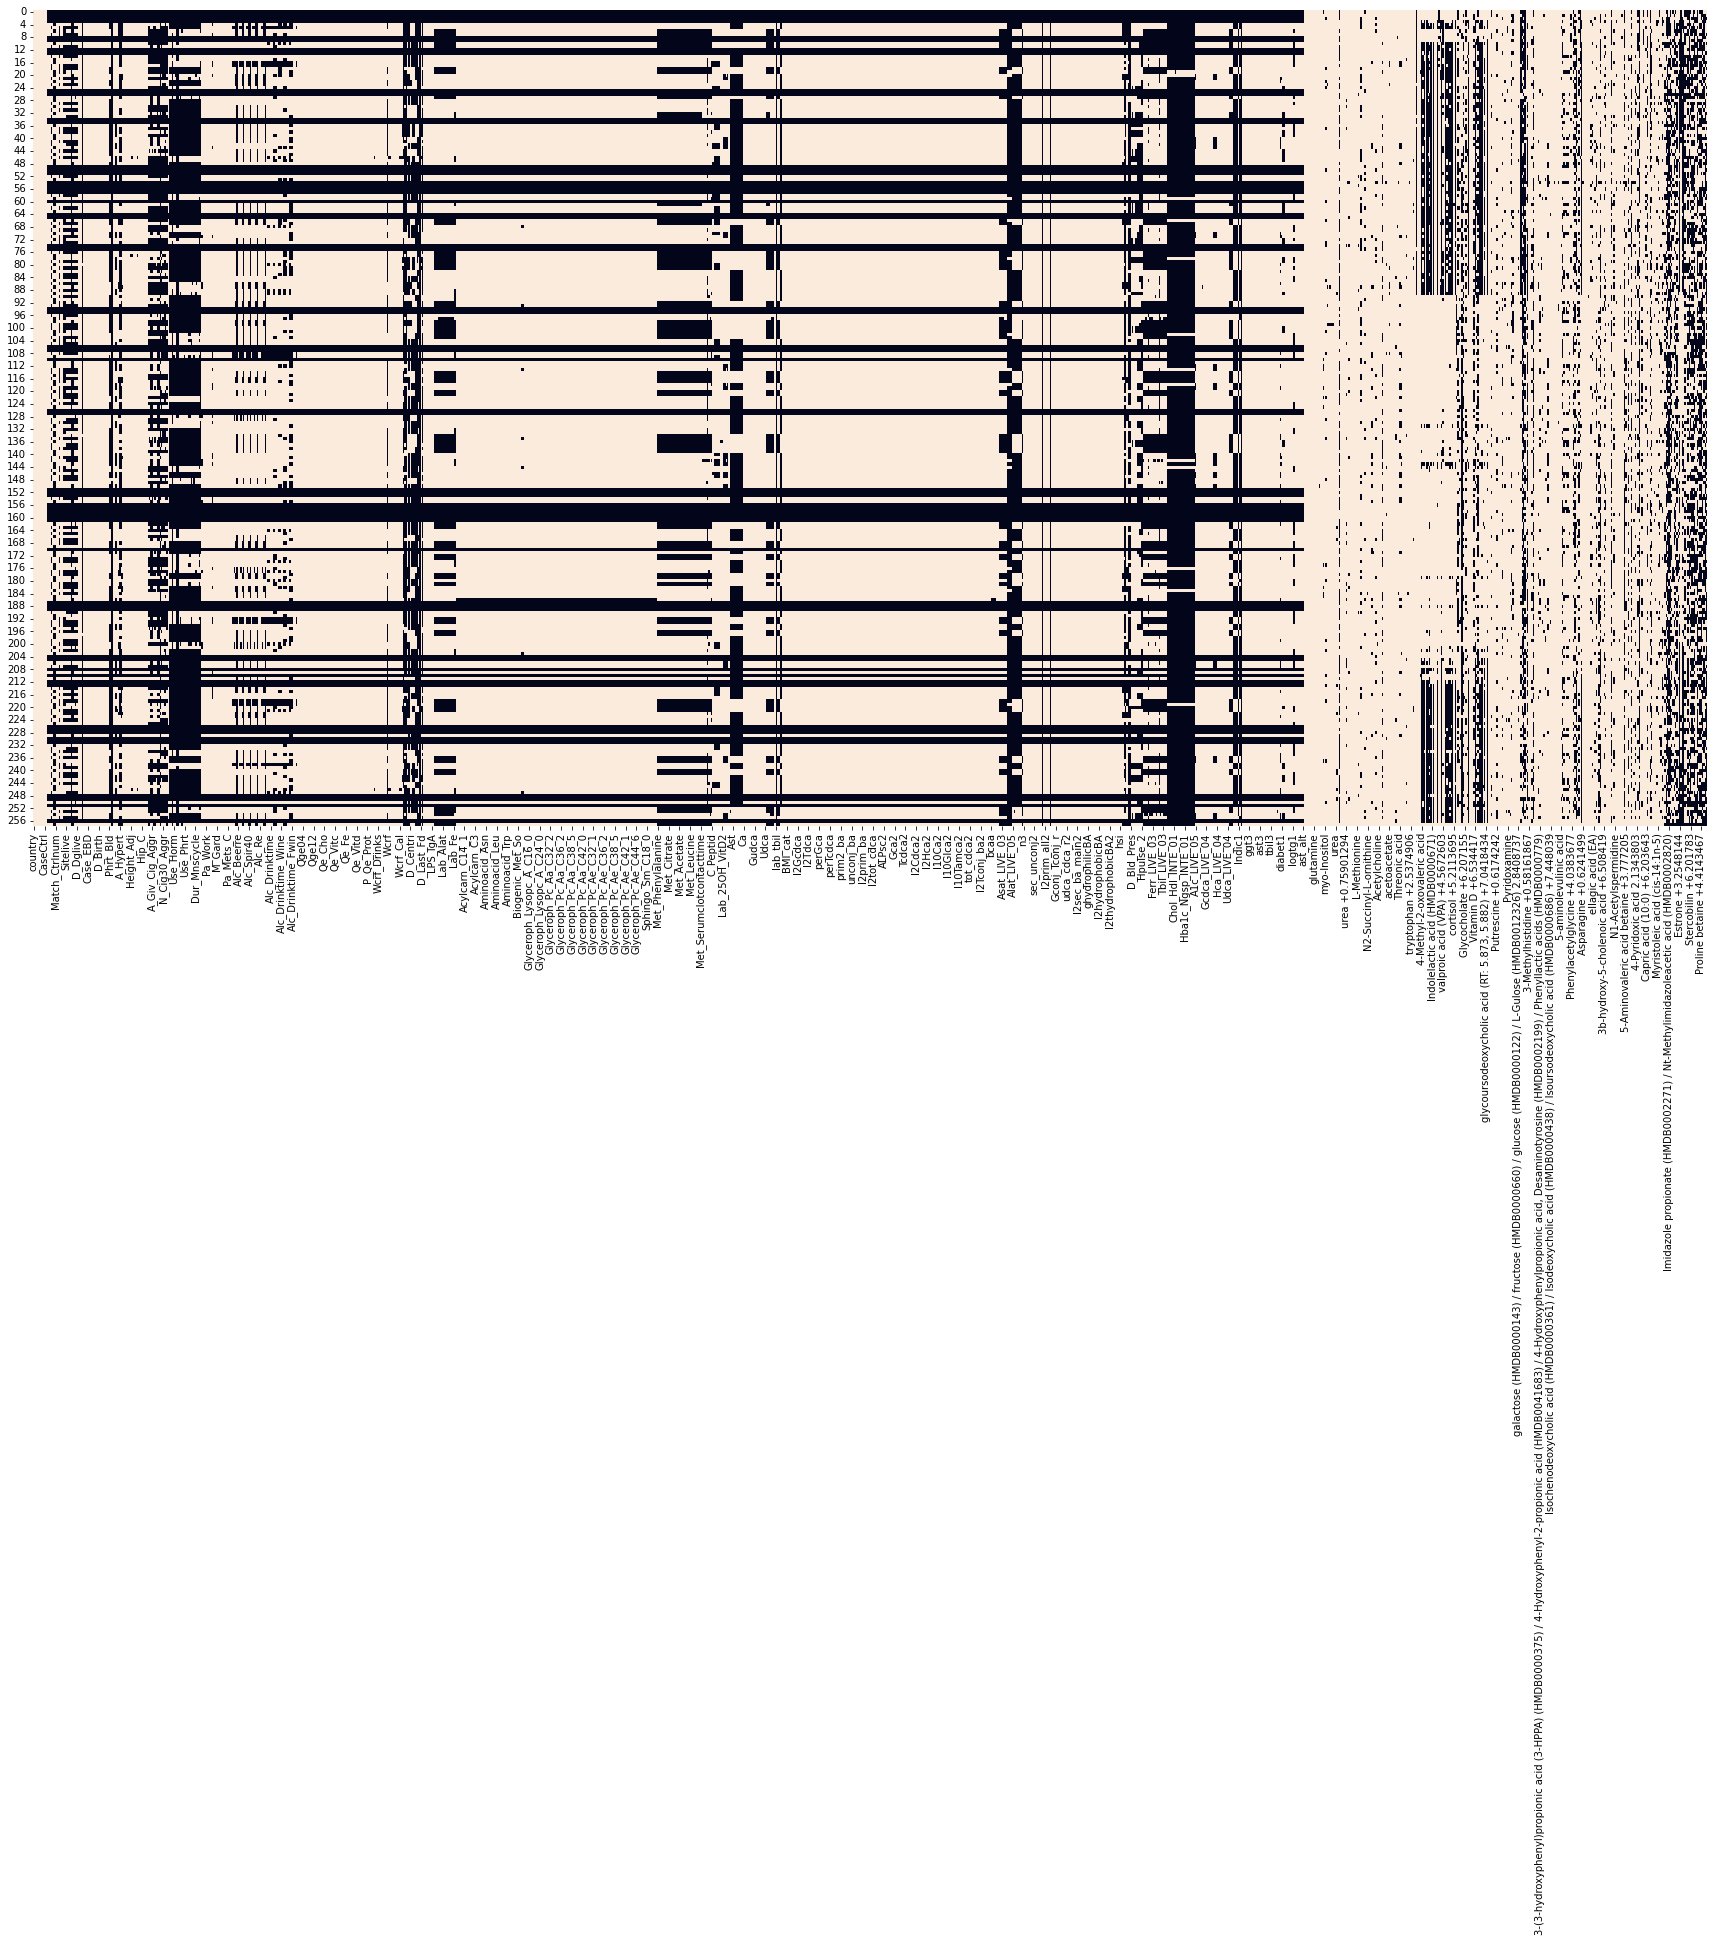

In [259]:
plt.figure(figsize=(30,15))
sns.heatmap(merge_full_inner.notna(), cbar=False);

### Save FINAL merged peak tables (outer and inner merges)

In [261]:
merge_full_outer.to_csv(pwd + 'data/prepare_HCC_data/usable_peakTables/peakTable-Agilent_and_metadata-original-outer_merge.csv',
                        index = False, header=True)
merge_full_inner.to_csv(pwd + 'data/prepare_HCC_data/usable_peakTables/peakTable-Agilent_and_metadata-original-inner_merge.csv',
                        index = False, header=True)

## Merge for UNFILTERED peak table

### Outer merge of UNFILTERED peak table and metadata based on *SampleID* column

In [262]:
merge_full_outer = pd.merge(whole_metadata_merge.rename(columns={'sample_ID': 'SampleID'}), peakTable_RP_POS_unfiltered, how='outer', on='SampleID')
merge_full_outer.insert(merge_full_outer.columns.get_loc('SampleID') + 1, 'SampleID_full', merge_full_outer.pop('SampleID_full'))
print(merge_full_outer.shape)
merge_full_outer.head()

(934, 2303)


,country,Center,Idepic_Bio,Idepic_Samp,SampleID,SampleID_full,Id_Bma,Id Aliquot,CaseCtrl,ID_split_HCC,...,"glycochenodeoxycholate sulfate (HMDB0002497) / N-[(3a,5b,7b)-7-hydroxy-24-oxo-3-(sulfooxy)cholan-24-yl]-Glycine (HMDB0002409)",2-Methylerythritol Esi+3.4488654,Lauric acid (12:0) Esi+5.6079946,D-alpha-Aminobutyric acid (HMDB0000650) / dimethylglycine (HMDB0000092) / GABA (HMDB0000112) / L-alpha-Aminobutyric acid (HMDB0000452) Esi+4.467588,cis-2-Methylaconitate Esi+8.439439,3-hydroxybutyric acid (HMDB0000357) / 4-Hydroxybutyric acid (HMDB0000710) / hydroxy-isobutyric acid (HMDB0000729) Esi+3.7422376,urea Esi+4.4950013,O-desmethylangolensin (ODMA) Esi+6.5020065,3-Methylhistidine Esi+2.9180892,Pelargonic acid (9:0) Esi+5.784802
0,6.0,61.0,61____61202893,61202893-s2#C1,LivCan_127,003_61-LivCan_127_003,61-LivCan_127,61202893-s2#C,Non-case,61202893.0,...,NaN,NaN,NaN,NaN,3194.0,9324.0,NaN,6432.0,2631.0,NaN
1,6.0,61.0,61____61212533,61212533-s2#C1,LivCan_128,004_61-LivCan_128_004,61-LivCan_128,61212533-s2#C,Incident,61212533.0,...,NaN,3077.0,NaN,4422.0,NaN,NaN,NaN,NaN,NaN,NaN
2,6.0,61.0,61____61100681,61100681-s2#C1,LivCan_285,005_61-LivCan_285_005,61-LivCan_285,61100681-s2#C,Non-case,61100681.0,...,NaN,NaN,NaN,NaN,NaN,7109.0,2738.0,5142.0,NaN,NaN
3,6.0,61.0,61____61106550,61106550-s2#C1,LivCan_286,006_61-LivCan_286_006,61-LivCan_286,61106550-s2#C,Incident,61106550.0,...,NaN,2053.0,NaN,NaN,2828.0,NaN,8334.0,NaN,NaN,NaN
4,4.0,41.0,41____41041872,41041872-s2#C1,LivCan_153,007_41-LivCan_153_007,41-LivCan_153,41041872-s2#C,Incident,41041872.0,...,NaN,3959.0,NaN,3388.0,3038.0,NaN,2767.0,NaN,NaN,NaN


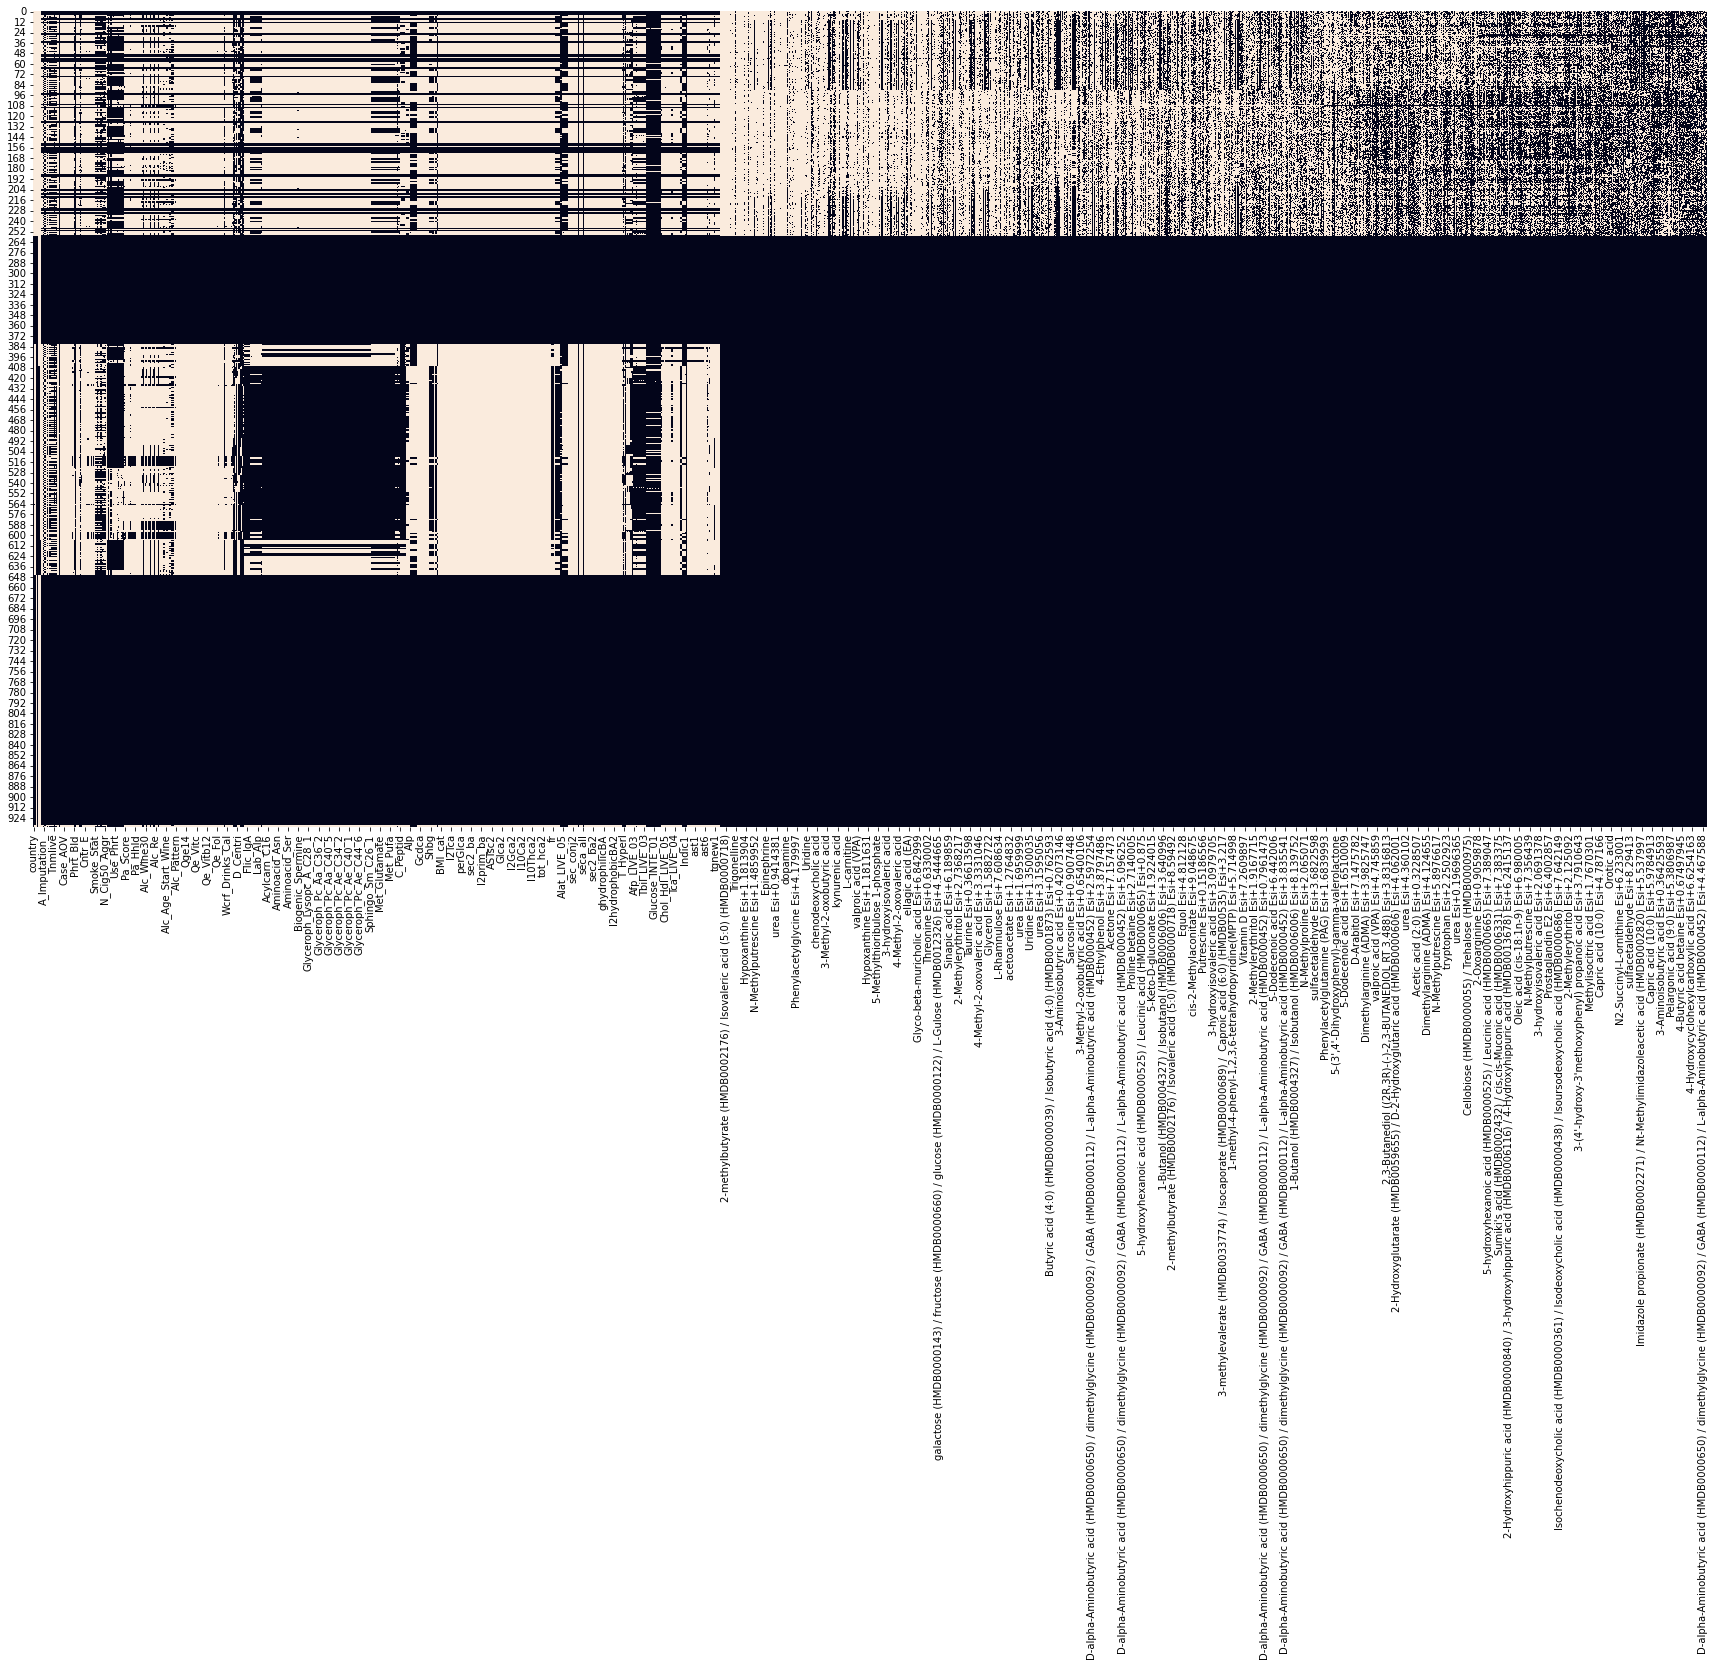

In [263]:
plt.figure(figsize=(30,15))
sns.heatmap(merge_full_outer.notna(), cbar=False);

### Inner merge of UNFILTERED peak table and metadata based on *SampleID* column

In [264]:
merge_full_inner = pd.merge(whole_metadata_merge.rename(columns={'sample_ID': 'SampleID'}), peakTable_RP_POS_unfiltered, how='inner', on='SampleID')
merge_full_inner.insert(merge_full_inner.columns.get_loc('SampleID') + 1, 'SampleID_full', merge_full_inner.pop('SampleID_full'))
print(merge_full_inner.shape)
merge_full_inner.head()

(258, 2303)


,country,Center,Idepic_Bio,Idepic_Samp,SampleID,SampleID_full,Id_Bma,Id Aliquot,CaseCtrl,ID_split_HCC,...,"glycochenodeoxycholate sulfate (HMDB0002497) / N-[(3a,5b,7b)-7-hydroxy-24-oxo-3-(sulfooxy)cholan-24-yl]-Glycine (HMDB0002409)",2-Methylerythritol Esi+3.4488654,Lauric acid (12:0) Esi+5.6079946,D-alpha-Aminobutyric acid (HMDB0000650) / dimethylglycine (HMDB0000092) / GABA (HMDB0000112) / L-alpha-Aminobutyric acid (HMDB0000452) Esi+4.467588,cis-2-Methylaconitate Esi+8.439439,3-hydroxybutyric acid (HMDB0000357) / 4-Hydroxybutyric acid (HMDB0000710) / hydroxy-isobutyric acid (HMDB0000729) Esi+3.7422376,urea Esi+4.4950013,O-desmethylangolensin (ODMA) Esi+6.5020065,3-Methylhistidine Esi+2.9180892,Pelargonic acid (9:0) Esi+5.784802
0,6.0,61.0,61____61202893,61202893-s2#C1,LivCan_127,003_61-LivCan_127_003,61-LivCan_127,61202893-s2#C,Non-case,61202893.0,...,NaN,NaN,NaN,NaN,3194.0,9324.0,NaN,6432.0,2631.0,NaN
1,6.0,61.0,61____61212533,61212533-s2#C1,LivCan_128,004_61-LivCan_128_004,61-LivCan_128,61212533-s2#C,Incident,61212533.0,...,NaN,3077.0,NaN,4422.0,NaN,NaN,NaN,NaN,NaN,NaN
2,6.0,61.0,61____61100681,61100681-s2#C1,LivCan_285,005_61-LivCan_285_005,61-LivCan_285,61100681-s2#C,Non-case,61100681.0,...,NaN,NaN,NaN,NaN,NaN,7109.0,2738.0,5142.0,NaN,NaN
3,6.0,61.0,61____61106550,61106550-s2#C1,LivCan_286,006_61-LivCan_286_006,61-LivCan_286,61106550-s2#C,Incident,61106550.0,...,NaN,2053.0,NaN,NaN,2828.0,NaN,8334.0,NaN,NaN,NaN
4,4.0,41.0,41____41041872,41041872-s2#C1,LivCan_153,007_41-LivCan_153_007,41-LivCan_153,41041872-s2#C,Incident,41041872.0,...,NaN,3959.0,NaN,3388.0,3038.0,NaN,2767.0,NaN,NaN,NaN


In [265]:
# check if the merge went well
merge_full_inner['SampleID'].isna().sum() == 0

True

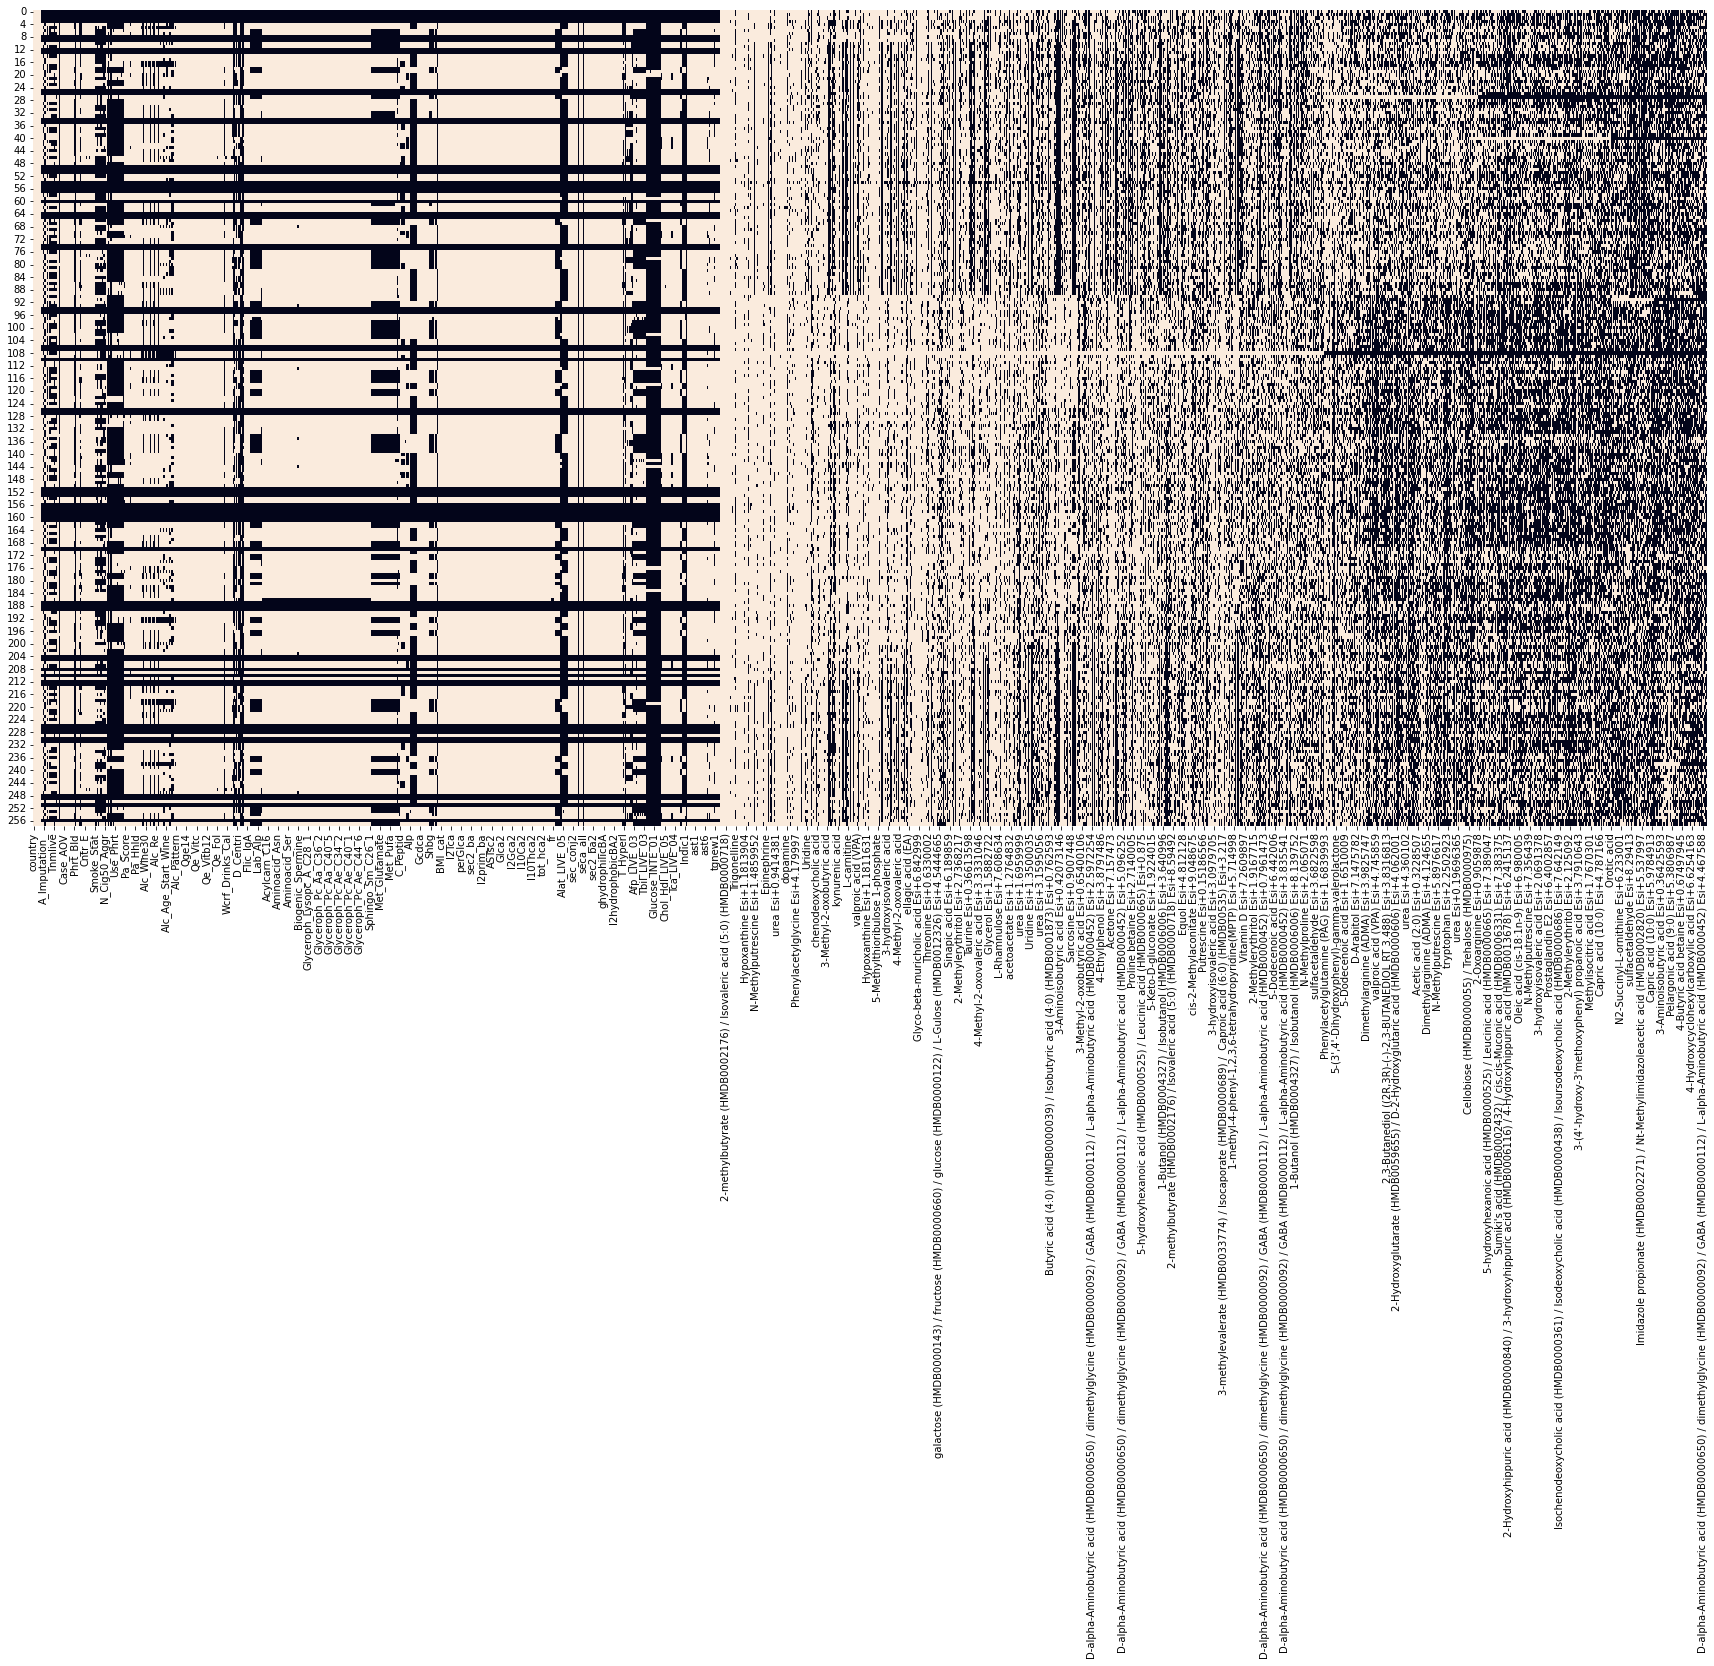

In [266]:
plt.figure(figsize=(30,15))
sns.heatmap(merge_full_inner.notna(), cbar=False);

### Save FINAL merged peak tables (outer and inner merges)

In [267]:
merge_full_outer.to_csv(pwd + 'data/prepare_HCC_data/usable_peakTables/peakTable-Agilent_and_metadata-unfiltered-outer_merge.csv',
                        index = False, header=True)
merge_full_inner.to_csv(pwd + 'data/prepare_HCC_data/usable_peakTables/peakTable-Agilent_and_metadata-unfiltered-inner_merge.csv',
                        index = False, header=True)

# Why do we have different number of samples between metaboigniter and Agilent analysis ?

## Agilent ORIGINAL peak table (RP_POS)

In [314]:
peakTable_RP_POS_original = pd.read_csv(pwd + 'data/prepare_HCC_data/usable_peakTables/peakTable-Agilent_and_metadata-original-inner_merge.csv',
                                  sep=',', decimal='.', na_values='NA')
print(peakTable_RP_POS_original.shape)
peakTable_RP_POS_original.head()

(258, 1245)


,country,Center,Idepic_Bio,Idepic_Samp,SampleID,SampleID_full,Id_Bma,Id Aliquot,CaseCtrl,ID_split_HCC,...,Mannitol +0.66278136,Etiocholanedione +5.97954,lecithin +8.494925,3-methyldioxyindole +3.5556717,L-Rhamnulose +4.069282,Proline betaine +4.4143467,Glycochenodeoxycholic acid (2) +6.552671,Indole-3-carboxylic acid +1.8496325,Isocitric acid,Lysine +0.8576003
0,6.0,61.0,61____61202893,61202893-s2#C1,LivCan_127,003_61-LivCan_127_003,61-LivCan_127,61202893-s2#C,Non-case,61202893.0,...,NaN,24035.0,NaN,2060.0,NaN,NaN,NaN,14146.0,37972.0,1957255.0
1,6.0,61.0,61____61212533,61212533-s2#C1,LivCan_128,004_61-LivCan_128_004,61-LivCan_128,61212533-s2#C,Incident,61212533.0,...,323383.0,27089.0,NaN,8893.0,5799.0,NaN,NaN,NaN,NaN,1244764.0
2,6.0,61.0,61____61100681,61100681-s2#C1,LivCan_285,005_61-LivCan_285_005,61-LivCan_285,61100681-s2#C,Non-case,61100681.0,...,NaN,NaN,NaN,16294.0,8127.0,NaN,43353.0,NaN,NaN,NaN
3,6.0,61.0,61____61106550,61106550-s2#C1,LivCan_286,006_61-LivCan_286_006,61-LivCan_286,61106550-s2#C,Incident,61106550.0,...,NaN,NaN,NaN,145511.0,17885.0,63467.0,NaN,NaN,NaN,3053811.0
4,4.0,41.0,41____41041872,41041872-s2#C1,LivCan_153,007_41-LivCan_153_007,41-LivCan_153,41041872-s2#C,Incident,41041872.0,...,47156.0,14465.0,470827.0,3169.0,NaN,NaN,92942.0,NaN,14278.0,954566.0


In [315]:
peakTable_RP_POS_original['country'].value_counts().sort_index()

2.0    56
3.0    22
4.0    30
5.0     8
6.0    32
7.0    64
9.0    46
Name: country, dtype: int64

#### There 32 samples from Greece in Agilent ORIGINAL peak table. We would have to remove them if we use this peak table for analysis

## Agilent FINAL peak table (RP_POS)

In [319]:
peakTable_RP_POS_final = pd.read_csv(pwd + 'data/prepare_HCC_data/usable_peakTables/peakTable-Agilent_and_metadata-final-inner_merge.csv',
                                  sep=',', decimal='.', na_values='NA')
print(peakTable_RP_POS_final.shape)
peakTable_RP_POS_final.head()

(229, 2160)


,country,Center,Idepic_Bio,Idepic_Samp,SampleID,SampleID_full,Id_Bma,Id Aliquot,CaseCtrl,ID_split_HCC,...,225.1218@0.86389714,398.7578@8.768545,288.1272@6.883725,126.0287@1.5353005,429.2873@6.211831,419.2505@8.916426,518.2205@6.2066946,400.2586@7.130359,103.0998@7.112515,267.142@6.969883
0,NaN,NaN,NaN,NaN,Blank_001,EPIC_Liver_Cancer_NR160614_001_Blank_001,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,Blank_101,EPIC_Liver_Cancer_NR160614_101_Blank_101,NaN,NaN,NaN,NaN,...,NaN,NaN,1429.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,Blank_201,EPIC_Liver_Cancer_NR160614_201_Blank_201,NaN,NaN,NaN,NaN,...,NaN,NaN,1685.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,41.0,41____41041872,41041872-s2#C1,LivCan_153,EPIC_Liver_Cancer_NR160614_007_41-LivCan_153_007,41-LivCan_153,41041872-s2#C,Incident,41041872.0,...,NaN,98959.0,20987.0,178906.0,NaN,184072.0,2547.0,6454.0,NaN,149023.0
4,4.0,41.0,41____41046868,41046868-s2#C1,LivCan_154,EPIC_Liver_Cancer_NR160614_008_41-LivCan_154_008,41-LivCan_154,41046868-s2#C,Non-case,41046868.0,...,2414.0,93145.0,28323.0,NaN,NaN,NaN,1043.0,6390.0,403011.0,164386.0


In [326]:
peakTable_RP_POS_final['country'].value_counts().sort_index()

2.0    56
3.0    22
4.0    30
5.0     8
7.0    64
9.0    46
Name: country, dtype: int64

#### No Greek samples in Agilent FINAL analysis so great !

## Remove samples which are not in pairs or don't have information in *Match_Caseset* column

In [327]:
peakTable_RP_POS_no_useless_samples = peakTable_RP_POS_final.copy()

In [328]:
peakTable_RP_POS_no_useless_samples['Match_Caseset'].value_counts(dropna=False)

NaN      30
305.0     2
89.0      2
387.0     2
425.0     2
         ..
318.0     1
322.0     1
157.0     1
350.0     1
433.0     1
Name: Match_Caseset, Length: 107, dtype: int64

#### Some samples are indeed in pairs, some are alone and some don't have information about their pair

In [330]:
print(peakTable_RP_POS_no_useless_samples[peakTable_RP_POS_no_useless_samples['Match_Caseset'].isna()].shape[0])
peakTable_RP_POS_no_useless_samples[peakTable_RP_POS_no_useless_samples['Match_Caseset'].isna()].head()

30


,country,Center,Idepic_Bio,Idepic_Samp,SampleID,SampleID_full,Id_Bma,Id Aliquot,CaseCtrl,ID_split_HCC,...,225.1218@0.86389714,398.7578@8.768545,288.1272@6.883725,126.0287@1.5353005,429.2873@6.211831,419.2505@8.916426,518.2205@6.2066946,400.2586@7.130359,103.0998@7.112515,267.142@6.969883
0,NaN,NaN,NaN,NaN,Blank_001,EPIC_Liver_Cancer_NR160614_001_Blank_001,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,Blank_101,EPIC_Liver_Cancer_NR160614_101_Blank_101,NaN,NaN,NaN,NaN,...,NaN,NaN,1429.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,Blank_201,EPIC_Liver_Cancer_NR160614_201_Blank_201,NaN,NaN,NaN,NaN,...,NaN,NaN,1685.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20,7.0,71.0,71____71061580,71061580-s2#B1,LivCan_402,EPIC_Liver_Cancer_NR160614_030_71-LivCan_402_030,71-LivCan_402,71061580-s2#B,Non-case,71061580.0,...,7982.0,107016.0,25148.0,172433.0,2223.0,152656.0,1897.0,4630.0,456765.0,NaN
21,2.0,24.0,24____24667578,24667578-s1#B1,LivCan_357,EPIC_Liver_Cancer_NR160614_031_24-LivCan_357_031,24-LivCan_357,24667578-s1#B,Non-case,24667578.0,...,4470.0,79962.0,18741.0,NaN,4610.0,162428.0,6441.0,5278.0,208531.0,134918.0


#### 30 samples (containing 3 *Blanks*) don't have information about their *Match_Caseset*

In [335]:
print(len(peakTable_RP_POS_no_useless_samples['Match_Caseset'].value_counts()[peakTable_RP_POS_no_useless_samples['Match_Caseset'].value_counts() == 1].index))
peakTable_RP_POS_no_useless_samples['Match_Caseset'].value_counts()[peakTable_RP_POS_no_useless_samples['Match_Caseset'].value_counts() == 1].index

13


Float64Index([156.0, 357.0,  39.0, 309.0, 397.0, 321.0, 198.0, 316.0, 318.0,
              322.0, 157.0, 350.0, 433.0],
             dtype='float64')

#### 13 samples don't have a matching sample for the pairs in *Match_Caseset*

#### Below are the pair indexes which have two samples, one case and one control

In [336]:
peakTable_RP_POS_no_useless_samples['Match_Caseset'].value_counts()[peakTable_RP_POS_no_useless_samples['Match_Caseset'].value_counts() == 2].index

Float64Index([ 82.0,  29.0,  89.0, 387.0, 425.0, 112.0,   9.0, 374.0, 381.0,
              196.0,  11.0, 400.0, 305.0, 177.0, 334.0,  24.0, 308.0, 331.0,
              497.0, 476.0, 483.0, 427.0, 368.0, 206.0, 403.0,  32.0, 356.0,
              147.0, 383.0,  56.0, 191.0,  72.0, 390.0,  64.0, 482.0, 189.0,
               31.0, 190.0,  81.0, 408.0, 445.0, 367.0,  84.0,  26.0,  36.0,
              108.0, 167.0, 510.0, 103.0,  37.0, 363.0,  70.0,  12.0, 493.0,
              153.0,  18.0, 326.0,  59.0, 158.0, 289.0, 176.0,  76.0, 203.0,
              152.0, 168.0,  33.0,  94.0,  86.0, 501.0,  48.0,  28.0, 376.0,
              296.0, 426.0, 481.0,  55.0, 502.0,  49.0, 477.0, 442.0, 406.0,
              174.0, 438.0, 192.0, 287.0, 500.0,  92.0, 435.0,  13.0, 171.0,
              411.0, 332.0,  38.0],
             dtype='float64')

#### If we keep only samples in pairs and the 3 *Blanks* :

In [340]:
rows_Blanks = peakTable_RP_POS_no_useless_samples[peakTable_RP_POS_no_useless_samples['SampleID'].str.contains('Blank_', na=False)]
rows_Blanks

,country,Center,Idepic_Bio,Idepic_Samp,SampleID,SampleID_full,Id_Bma,Id Aliquot,CaseCtrl,ID_split_HCC,...,225.1218@0.86389714,398.7578@8.768545,288.1272@6.883725,126.0287@1.5353005,429.2873@6.211831,419.2505@8.916426,518.2205@6.2066946,400.2586@7.130359,103.0998@7.112515,267.142@6.969883
0,NaN,NaN,NaN,NaN,Blank_001,EPIC_Liver_Cancer_NR160614_001_Blank_001,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,Blank_101,EPIC_Liver_Cancer_NR160614_101_Blank_101,NaN,NaN,NaN,NaN,...,NaN,NaN,1429.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,Blank_201,EPIC_Liver_Cancer_NR160614_201_Blank_201,NaN,NaN,NaN,NaN,...,NaN,NaN,1685.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [341]:
peakTable_Agilent = peakTable_RP_POS_no_useless_samples[peakTable_RP_POS_no_useless_samples['Match_Caseset']
                                    .isin(peakTable_RP_POS_no_useless_samples['Match_Caseset']
                                         .value_counts()[peakTable_RP_POS_no_useless_samples['Match_Caseset'].value_counts() == 2].index)]

peakTable_Agilent = pd.concat([rows_Blanks, peakTable_Agilent], axis=0)
peakTable_Agilent

,country,Center,Idepic_Bio,Idepic_Samp,SampleID,SampleID_full,Id_Bma,Id Aliquot,CaseCtrl,ID_split_HCC,...,225.1218@0.86389714,398.7578@8.768545,288.1272@6.883725,126.0287@1.5353005,429.2873@6.211831,419.2505@8.916426,518.2205@6.2066946,400.2586@7.130359,103.0998@7.112515,267.142@6.969883
0,NaN,NaN,NaN,NaN,Blank_001,EPIC_Liver_Cancer_NR160614_001_Blank_001,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,Blank_101,EPIC_Liver_Cancer_NR160614_101_Blank_101,NaN,NaN,NaN,NaN,...,NaN,NaN,1429.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,Blank_201,EPIC_Liver_Cancer_NR160614_201_Blank_201,NaN,NaN,NaN,NaN,...,NaN,NaN,1685.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,41.0,41____41041872,41041872-s2#C1,LivCan_153,EPIC_Liver_Cancer_NR160614_007_41-LivCan_153_007,41-LivCan_153,41041872-s2#C,Incident,41041872.0,...,NaN,98959.0,20987.0,178906.0,NaN,184072.0,2547.0,6454.0,NaN,149023.0
4,4.0,41.0,41____41046868,41046868-s2#C1,LivCan_154,EPIC_Liver_Cancer_NR160614_008_41-LivCan_154_008,41-LivCan_154,41046868-s2#C,Non-case,41046868.0,...,2414.0,93145.0,28323.0,NaN,NaN,NaN,1043.0,6390.0,403011.0,164386.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218,3.0,32.0,32____32253231,32253231-s3#C1,LivCan_080,EPIC_Liver_Cancer_NR160614_275_32-LivCan_080_275,275_32-LivCan_080_275,32253231-s3#C,Non-case,32253231.0,...,NaN,97137.0,24680.0,96880.0,1965.0,NaN,1781.0,40682.0,228548.0,111077.0
223,2.0,22.0,22____22281416,22281416-s1#B1,LivCan_375,EPIC_Liver_Cancer_NR160614_281_22-LivCan_375_281,281_22-LivCan_375_281,22281416-s1#B,Incident,22281416.0,...,4823.0,NaN,17378.0,93893.0,9988.0,87218.0,9131.0,NaN,221296.0,97565.0
224,2.0,22.0,22____22281701,22281701-s1#B1,LivCan_376,EPIC_Liver_Cancer_NR160614_282_22-LivCan_376_282,282_22-LivCan_376_282,22281701-s1#B,Non-case,22281701.0,...,4761.0,NaN,16624.0,108831.0,3127.0,NaN,2387.0,17483.0,369559.0,NaN
225,7.0,71.0,71____71000065,71000065-s2#C1,LivCan_165,EPIC_Liver_Cancer_NR160614_283_71-LivCan_165_283,283_71-LivCan_165_283,71000065-s2#C,Incident,71000065.0,...,38674.0,89525.0,11619.0,105422.0,3152.0,89313.0,2485.0,14052.0,212520.0,NaN


#### We get back to 186 samples + 3 Blanks used in the metaboigniter analysis

## metaboigniter peak table (HILIC_POS)

In [377]:
peakTable_metaboigniter = pd.read_csv(pwd + 'data/prepare_HCC_data/usable_peakTables/peakTable-metaboigniter_and_metadata-inner_merge.csv',
                                  sep=',', decimal='.', na_values='NA')
print(peakTable_metaboigniter.shape)
peakTable_metaboigniter.head()

(186, 1501)


,country,Center,Idepic_Bio,Idepic_Samp,SampleID,Id_Bma,Id Aliquot,CaseCtrl,ID_split_HCC,Idepic,...,variable_2339,variable_2340,variable_2350,variable_2353,variable_2364,variable_2365,variable_2368,variable_2370,variable_2375,variable_2379
0,4.0,41.0,41____41041872,41041872-s2#C1,LivCan_153,41-LivCan_153,41041872-s2#C,Incident,41041872.0,41____41041872,...,12.052252,12.568647,13.192848,13.230752,12.248590,12.114328,14.269258,12.355017,13.114289,13.882526
1,4.0,41.0,41____41046868,41046868-s2#C1,LivCan_154,41-LivCan_154,41046868-s2#C,Non-case,41046868.0,41____41046868,...,13.020365,12.928643,13.697314,NaN,12.604052,NaN,NaN,12.208084,NaN,NaN
2,4.0,41.0,41____41074588,41074588-s1#B1,LivCan_267,41-LivCan_267,41074588-s1#B,Incident,41074588.0,41____41074588,...,NaN,NaN,NaN,13.330175,NaN,NaN,14.215988,NaN,12.955618,13.778398
3,4.0,41.0,41____41089214,41089214-s1#B1,LivCan_268,41-LivCan_268,41089214-s1#B,Non-case,41089214.0,41____41089214,...,NaN,NaN,13.086805,13.304171,NaN,11.605353,14.284148,12.319119,13.058285,13.812829
4,2.0,21.0,21____21103888,21103888-s1#B1,LivCan_299,21-LivCan_299,21103888-s1#B,Incident,21103888.0,21____21103888,...,NaN,NaN,NaN,13.306722,12.349830,11.926237,14.192775,NaN,13.006556,13.841201


#### The index country 6 corresponds to Greece, we have to remove the samples from this country for further analysis 

In [378]:
peakTable_metaboigniter['country'].value_counts().sort_index()

2.0    50
3.0    20
4.0    26
5.0     8
7.0    56
9.0    26
Name: country, dtype: int64

#### The files corresponding to Greece have already been removed for the metaboigniter analysis

## Save metaboigniter (HILIC_POS) and Agilent (RP_POS) peak tables we can compare now because they contain the same samples !

In [379]:
peakTable_Agilent.to_csv(pwd + 'data/prepare_HCC_data/usable_peakTables/peakTable-Agilent-186_samples.csv',
                        index = False, header=True)
peakTable_metaboigniter.to_csv(pwd + 'data/prepare_HCC_data/usable_peakTables/peakTable-metaboigniter-186_samples.csv',
                        index = False, header=True)

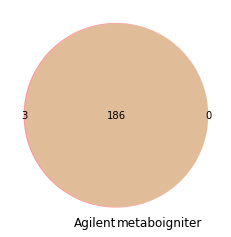

In [382]:
Agilent_samples = set(peakTable_Agilent['SampleID'])
metaboigniter_samples = set(peakTable_metaboigniter['SampleID'])

venn2([Agilent_samples, metaboigniter_samples], ('Agilent', 'metaboigniter'))
plt.show()

In [383]:
Agilent_samples - metaboigniter_samples

{'Blank_001', 'Blank_101', 'Blank_201'}

### We indeed have all the same samples in metaboigniter and final Agilent peak table (+3 *Blanks*)